## Luca Ambrosio
### Final Project

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
from scipy import stats
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
import sklearn.ensemble
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from scipy.spatial.distance import squareform
from scipy.spatial.distance import pdist
from scipy.spatial.distance import cdist
from sklearn.cluster import AgglomerativeClustering
import networkx as nx
from sklearn.ensemble import RandomForestClassifier
import community


### 1. Calculate the number of users and artists present in the network.

In [2]:
data1 = pd.read_csv("artists.csv",error_bad_lines=False, sep = '\t')
data2 = pd.read_csv("user_artists.csv",error_bad_lines=False, sep = '\t')
data3 = pd.read_csv("user_friends.csv",error_bad_lines=False, sep = '\t')
data4 = pd.read_csv("user_artists.csv",error_bad_lines=False, sep = '\t')
data5 = pd.read_csv("user_taggedartists_timestamps.csv",error_bad_lines=False, sep = '\t')
data7 = pd.read_csv("user_taggedartists.csv",error_bad_lines=False, sep = '\t')

In [3]:
print("number of artists: ",data1.shape[0])
print("number of users: ", len(data2["userID"].unique()))

number of artists:  17632
number of users:  1892


### 2. Calculate the number of bi-directional user-friend relations pairs

In [4]:
cont = 0 
for x in np.array(data3):
    a=x[0]
    b=x[1]
    for y in np.array(data3):
        c=y[0]
        d=y[1]
        if c == b:
            if  d==a: 
                cont = cont +1
print("the number of bi-directional user-friend relations pairs is :",cont)

the number of bi-directional user-friend relations pairs is : 25434


### 3. Calculate the average friend relations per user

In [5]:
cont=0
array = []
visited = []
for x in np.array(data3):
    a=x[0]
    b=x[1]
    if(a not in visited):
        for y in np.array(data3):
            c=y[0]
            d=y[1]
            if a == c:
                cont = cont + 1
        array.append(cont)
        cont=0
        visited.append(a)
print("the average friend relations per user",np.mean(array))

the average friend relations per user 13.44291754756871


### 4. Calculate the number of user-listened artists relations (couples user-artist).

In [6]:
cont=0
array=[]
visited=[]
for x in np.array(data4):
    a=x[0]
    b=x[1]
    if(a not in visited):
        visited.append(a)
        for y in np.array(data4):
            c=y[0]
            d=y[1]
            if a == c:
                cont = cont + 1
        array.append([a,cont])
        cont=0
print(array)

[[1430, 47], [822, 44], [1335, 48], [815, 44], [1147, 44], [2093, 44], [656, 46], [80, 44], [1273, 47], [1340, 48], [1947, 45], [1047, 45], [1484, 47], [603, 47], [1501, 47], [1530, 48], [451, 45], [50, 47], [1028, 48], [1509, 43], [576, 46], [335, 44], [1078, 42], [503, 50], [1036, 48], [1915, 43], [720, 41], [1525, 47], [780, 41], [329, 43], [409, 45], [57, 47], [1615, 47], [760, 41], [2064, 45], [809, 46], [814, 45], [217, 42], [541, 43], [1832, 47], [1993, 46], [354, 46], [1489, 45], [13, 44], [1236, 45], [1192, 47], [1577, 46], [1432, 8], [1289, 43], [1706, 44], [1754, 46], [1660, 40], [292, 45], [1618, 47], [2096, 42], [767, 43], [283, 42], [1071, 44], [1811, 47], [905, 46], [274, 46], [1699, 44], [661, 48], [1581, 38], [529, 45], [1046, 43], [543, 46], [314, 44], [1413, 43], [1426, 38], [1527, 47], [1499, 45], [560, 46], [1164, 44], [432, 43], [1157, 42], [1405, 46], [45, 44], [906, 49], [1883, 44], [888, 44], [1329, 43], [670, 44], [806, 41], [46, 45], [1474, 43], [1363, 42], [

### 5. Plot the distribution of the number of artists listened by each user, and calculate the average and mode of the distribution.

Plot the distribution of the number of artists listened by each user
calculate the average : 44.1284355179704
calculate the mode of the distribution : [45]


C:\Users\Luca\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


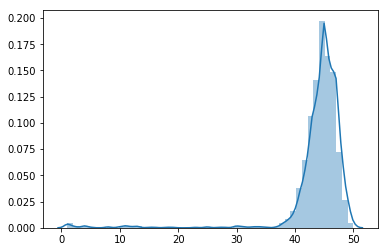

In [7]:
a =[]
for e in array:
    a.append(e[1])
print("Plot the distribution of the number of artists listened by each user")
sns.distplot(a)
print("calculate the average :", np.mean(a))
print("calculate the mode of the distribution :",stats.mode(a)[0])
 

### 6. Plot the distribution of the number of tag assignments per each artist, and calculate the average and mode of the distribution.

Plot the distribution of the number of tag assignments per each artist
calculate the average : 14.890920705901141
calculate the mode of the distribution : [1]


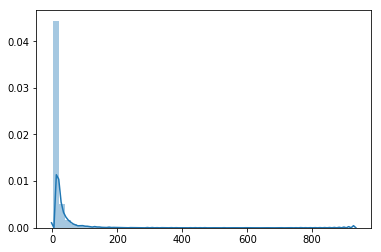

In [8]:
#gli artisti con 0 tag all'interno di questa analisi non sono stati considerati
#numero di tag assegnati per ogni artista
#calcolare la media e la moda della distribuzione
cont=0
array=[]
visited=[]
for x in np.array(data5):
    a=x[1]
    b=x[2]
    if(a not in visited):
        visited.append(a)
        for y in np.array(data5):
            c=y[1]
            d=y[2]
            if a == c:
                cont = cont + 1
        array.append([a,cont])
        cont=0
a =[]
for e in array:
    a.append(e[1])
print("Plot the distribution of the number of tag assignments per each artist")
sns.distplot(a)
print("calculate the average :", np.mean(a))
print("calculate the mode of the distribution :",stats.mode(a)[0])

### 7. Plot the distribution of the number of tag assignments per each user, and calculate the average and mode of the distribution.

Plot the distribution of the number of tag assignments per each user
calculate the average : 98.56183932346723
calculate the mode of the distribution : [3]


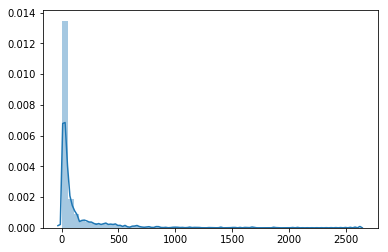

In [9]:
#gli utenti che non hanno assegnato tag non sono stati presi in considerazione durante questa analisi
#numero di tag assegnati da ogni utente
#calcolare la media e la moda della distribuzione
cont=0
array=[]
visited=[]
for x in np.array(data5):
    a=x[0]
    b=x[2]
    if(a not in visited):
        visited.append(a)
        for y in np.array(data5):
            c=y[0]
            d=y[2]
            if a == c:
                cont = cont + 1
        array.append([a,cont])
        cont=0
a =[]
for e in array:
    a.append(e[1])
print("Plot the distribution of the number of tag assignments per each user")
sns.distplot(a)
print("calculate the average :", np.mean(a))
print("calculate the mode of the distribution :",stats.mode(a)[0])

### 8. Plot the distribution of the number of distinct tag assignments per each artist, and calculate the average and mode of the distribution


In [10]:
# 8. Tracciare la distribuzione del numero di assegnazioni di tag distinti per ogni artista, e calcolare la media e la modalità di distribuzione.
#gli artisti con 0 tag all'interno di questa analisi non sono stati considerati
#numero di tag assegnati per ogni artista univoci
#calcolare la media e la moda della distribuzione
taglist = []
array=[]
visited=[]
for x in np.array(data5):
    a=x[1]
    if(a not in visited):
        visited.append(a)
        for y in np.array(data5):
            c=y[1]
            d=y[2]
            if a == c:
                taglist.append(d)
        array.append([a,taglist])
        taglist = [] 

Plot the distribution of the number of tag assignments per each artist
calculate the average : 8.763874470973409
calculate the mode of the distribution : [1]


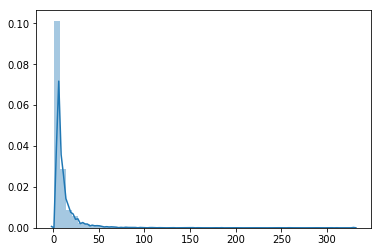

In [11]:
a =[]
#print(array[1])
for e in array:
    #print(e[1])
    f = np.array(e[1])
    ff = np.unique(f)
    lun = len(ff)
    a.append(lun)
print("Plot the distribution of the number of tag assignments per each artist")
sns.distplot(a)
print("calculate the average :", np.mean(a))
print("calculate the mode of the distribution :",stats.mode(a)[0])

## Task2: Clustering tags

Clustering music tags according to the artists association (content vectors).

1. Cluster tags according to the association to artists​. ​Justify your choices and comments on the results. Consider at least two different clustering algorithms based on similarity between tags, and compare the clustering.

In [12]:
# Filtro i tag rimuovendo le  quelli usati meno di 5 volte
filter_tag = data7.groupby('tagID').filter(lambda x : len(x) > 5)
tags_length = len(set(filter_tag['tagID']))

In [13]:
# Costruisco una matrice che ha sulle righe i tag e sulle colonne gli artisti, come valore il numero di volte che un artista è stato taggato con quel tag (in percentuale)
adjacency_matrix = pd.crosstab(filter_tag['tagID'], filter_tag['artistID'])


In [14]:
# Normalizzo la matrice
matrix_power_2 = adjacency_matrix ** 2
squared_sums = matrix_power_2.sum(axis=1).pow(1./2)
adjacency_matrix_normalized = adjacency_matrix.divide(squared_sums, axis='rows')
adjacency_matrix_normalized

artistID  1         2         3         4      5         6         7      \
tagID                                                                      
1           0.0  0.000000  0.000000  0.015875    0.0  0.000000  0.198431   
2           0.0  0.000000  0.000000  0.000000    0.0  0.000000  0.078353   
3           0.0  0.000000  0.000000  0.000000    0.0  0.000000  0.000000   
4           0.0  0.000000  0.078811  0.000000    0.0  0.105081  0.000000   
5           0.0  0.000000  0.000000  0.000000    0.0  0.000000  0.000000   
6           0.0  0.000000  0.000000  0.000000    0.0  0.000000  0.387557   
7           0.0  0.000000  0.000000  0.023174    0.0  0.139047  0.023174   
8           0.0  0.000000  0.000000  0.000000    0.0  0.000000  0.000000   
9           0.0  0.000000  0.000000  0.000000    0.0  0.000000  0.000000   
10          0.0  0.000000  0.000000  0.000000    0.0  0.000000  0.000000   
12          0.0  0.000000  0.000000  0.000000    0.0  0.000000  0.000000   
13          0.0  0.000000  0.000000  0.000000    0.0  0.000000  0.000000   
14          0.0  0.009954  0.000000  0.000000    0.0  0.000000  0.000000   
15          0.0  0.000000  0.000000  0.000000    0.0  0.000000  0.000000   
16          0.0  0.000000  0.000000  0.000000    0.0  0.000000  0.000000   
17          0.0  0.000000  0.000000  0.000000    0.0  0.000000  0.000000   
18          0.0  0.004586  0.000000  0.000000    0.0  0.000000  0.000000   
19          0.0  0.000000  0.000000  0.000000    0.0  0.000000  0.000000   
20          0.0  0.000000  0.000000  0.000000    0.0  0.000000  0.000000   
21          0.0  0.000000  0.000000  0.000000    0.0  0.000000  0.000000   
22          0.0  0.000000  0.000000  0.000000    0.0  0.000000  0.000000   
23          0.0  0.000000  0.000000  0.000000    0.0  0.000000  0.000000   
24          0.0  0.000000  0.000000  0.000000    0.0  0.000000  0.000000   
25          0.0  0.000000  0.000000  0.000000    0.0  0.000000  0.000000   
26          0.0  0.000000  0.000000  0.000000    0.0  0.000000  0.000000   
27          0.0  0.000000  0.000000  0.000000    0.0  0.000000  0.000000   
28          0.0  0.000000  0.000000  0.000000    0.0  0.000000  0.000000   
30          0.0  0.152854  0.000000  0.000000    0.0  0.000000  0.000000   
32          0.0  0.000000  0.000000  0.000000    0.0  0.000000  0.000000   
33          0.0  0.000000  0.000000  0.000000    0.0  0.000000  0.000000   
...         ...       ...       ...       ...    ...       ...       ...   
12287       0.0  0.000000  0.000000  0.000000    0.0  0.000000  0.000000   
12288       0.0  0.000000  0.000000  0.000000    0.0  0.000000  0.000000   
12289       0.0  0.000000  0.000000  0.000000    0.0  0.000000  0.000000   
12290       0.0  0.000000  0.000000  0.000000    0.0  0.000000  0.000000   
12291       0.0  0.000000  0.000000  0.000000    0.0  0.000000  0.000000   
12295       0.0  0.000000  0.000000  0.000000    0.0  0.000000  0.000000   
12297       0.0  0.000000  0.000000  0.000000    0.0  0.000000  0.000000   
12298       0.0  0.000000  0.000000  0.000000    0.0  0.000000  0.000000   
12358       0.0  0.000000  0.000000  0.000000    0.0  0.000000  0.000000   
12359       0.0  0.000000  0.000000  0.000000    0.0  0.000000  0.000000   
12361       0.0  0.000000  0.000000  0.000000    0.0  0.000000  0.000000   
12372       0.0  0.000000  0.000000  0.000000    0.0  0.000000  0.000000   
12472       0.0  0.000000  0.000000  0.000000    0.0  0.000000  0.000000   
12522       0.0  0.000000  0.000000  0.000000    0.0  0.000000  0.000000   
12529       0.0  0.000000  0.000000  0.000000    0.0  0.000000  0.000000   
12534       0.0  0.000000  0.000000  0.000000    0.0  0.000000  0.000000   
12535       0.0  0.000000  0.000000  0.000000    0.0  0.000000  0.000000   
12536       0.0  0.000000  0.000000  0.000000    0.0  0.000000  0.000000   
12537       0.0  0.000000  0.000000  0.000000    0.0  0.000000  0.000000   
12548       0.0  0.000000  0.000000  0.000000   

In [15]:
# Caldolo la matrice di similatrità
similarity_matrix = adjacency_matrix_normalized.dot(adjacency_matrix_normalized.transpose())
similarity_matrix

tagID     1         2         3         4         5         6         7      \
tagID                                                                         
1      1.000000  0.515560  0.003113  0.061512  0.206248  0.278903  0.197738   
2      0.515560  1.000000  0.000000  0.000000  0.025693  0.072204  0.019368   
3      0.003113  0.000000  1.000000  0.000000  0.000000  0.005067  0.013635   
4      0.061512  0.000000  0.000000  1.000000  0.106048  0.014254  0.054183   
5      0.206248  0.025693  0.000000  0.106048  1.000000  0.045138  0.024763   
6      0.278903  0.072204  0.005067  0.014254  0.045138  1.000000  0.024549   
7      0.197738  0.019368  0.013635  0.054183  0.024763  0.024549  1.000000   
8      0.000000  0.000000  0.000000  0.033230  0.000000  0.000000  0.000000   
9      0.005818  0.015954  0.047919  0.000000  0.000000  0.012626  0.000000   
10     0.000000  0.000000  0.000000  0.017762  0.000000  0.000000  0.000000   
12     0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
13     0.008577  0.004368  0.017660  0.000000  0.001746  0.000000  0.011328   
14     0.005609  0.000260  0.021473  0.011244  0.005571  0.001800  0.001153   
15     0.000645  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
16     0.004893  0.000374  0.213685  0.000188  0.000000  0.001111  0.000997   
17     0.006228  0.000000  0.129847  0.000644  0.000000  0.000000  0.000000   
18     0.016635  0.002635  0.071951  0.004096  0.002100  0.021447  0.003613   
19     0.017284  0.000000  0.162690  0.000000  0.000000  0.000000  0.000000   
20     0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
21     0.001795  0.000000  0.002112  0.000000  0.000183  0.000278  0.000000   
22     0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
23     0.000220  0.000000  0.005425  0.000000  0.000000  0.000000  0.003205   
24     0.006989  0.000577  0.008665  0.000995  0.000428  0.000000  0.004900   
25     0.070614  0.001931  0.175145  0.002242  0.002412  0.001911  0.000000   
26     0.036964  0.006990  0.031494  0.018281  0.005448  0.000000  0.013646   
27     0.014000  0.001645  0.024708  0.000000  0.000000  0.000000  0.052555   
28     0.054583  0.007043  0.000000  0.000000  0.000000  0.174194  0.009375   
30     0.086626  0.011977  0.029977  0.000803  0.005704  0.274873  0.023379   
32     0.015767  0.007592  0.028506  0.044548  0.000000  0.000000  0.000000   
33     0.030852  0.017915  0.017937  0.015617  0.004266  0.002363  0.000530   
...         ...       ...       ...       ...       ...       ...       ...   
12287  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
12288  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
12289  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
12290  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
12291  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
12295  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
12297  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
12298  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
12358  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
12359  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
12361  0.010040  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
12372  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
12472  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
12522  0.027000  0.000000  0.074125  0.000000  0.000000  0.019531  0.000000   
12529  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
12534  0.006604  0.007244  0.000000  0.000000  0.000000  0.000000  0.000000   
12535  0.093971  0.085300  0.000000  0.000000  0.000000  0.000000  0.000000   
12536  0.103692  0.042650  0.080064  0.000000  0.0

In [16]:
distance_matrix = pd.DataFrame(squareform(pdist(adjacency_matrix_normalized)), columns = adjacency_matrix_normalized.index, index = adjacency_matrix_normalized.index)
distance_matrix

tagID     1         2         3         4         5         6         7      \
tagID                                                                         
1      0.000000  0.984317  1.412010  1.370028  1.259962  1.200914  1.266698   
2      0.984317  0.000000  1.414214  1.414214  1.395927  1.362201  1.400451   
3      1.412010  1.414214  0.000000  1.414214  1.414214  1.410626  1.404539   
4      1.370028  1.414214  1.414214  0.000000  1.337125  1.404098  1.375367   
5      1.259962  1.395927  1.414214  1.337125  0.000000  1.381928  1.396593   
6      1.200914  1.362201  1.410626  1.404098  1.381928  0.000000  1.396747   
7      1.266698  1.400451  1.404539  1.375367  1.396593  1.396747  0.000000   
8      1.414214  1.414214  1.414214  1.390518  1.414214  1.414214  1.414214   
9      1.410094  1.402887  1.379914  1.414214  1.414214  1.405257  1.414214   
10     1.414214  1.414214  1.414214  1.401598  1.414214  1.414214  1.414214   
12     1.414214  1.414214  1.414214  1.414214  1.414214  1.414214  1.414214   
13     1.408136  1.411122  1.401671  1.414214  1.412979  1.414214  1.406180   
14     1.410242  1.414030  1.398947  1.406240  1.410268  1.412940  1.413398   
15     1.413757  1.414214  1.414214  1.414214  1.414214  1.414214  1.414214   
16     1.410749  1.413949  1.254045  1.414080  1.414214  1.413428  1.413509   
17     1.409803  1.414214  1.319207  1.413758  1.414214  1.414214  1.414214   
18     1.402402  1.412349  1.362387  1.411314  1.412728  1.398966  1.411656   
19     1.401939  1.414214  1.294071  1.414214  1.414214  1.414214  1.414214   
20     1.414214  1.414214  1.414214  1.414214  1.414214  1.414214  1.414214   
21     1.412944  1.414214  1.412719  1.414214  1.414084  1.414017  1.414214   
22     1.414214  1.414214  1.414214  1.414214  1.414214  1.414214  1.414214   
23     1.414058  1.414214  1.410373  1.414214  1.414214  1.414214  1.411945   
24     1.409263  1.413806  1.408073  1.413510  1.413911  1.414214  1.410744   
25     1.363368  1.412847  1.284410  1.412628  1.412507  1.412862  1.414214   
26     1.387830  1.409262  1.391766  1.401227  1.410356  1.414214  1.404532   
27     1.404279  1.413050  1.396633  1.414214  1.414214  1.414214  1.376550   
28     1.375076  1.409224  1.414214  1.414214  1.414214  1.285151  1.407569   
30     1.351573  1.405719  1.392855  1.413646  1.410175  1.204265  1.397584   
32     1.403020  1.408835  1.393911  1.382354  1.414214  1.414214  1.414214   
33     1.392227  1.401488  1.401473  1.403127  1.411194  1.412542  1.413839   
...         ...       ...       ...       ...       ...       ...       ...   
12287  1.414214  1.414214  1.414214  1.414214  1.414214  1.414214  1.414214   
12288  1.414214  1.414214  1.414214  1.414214  1.414214  1.414214  1.414214   
12289  1.414214  1.414214  1.414214  1.414214  1.414214  1.414214  1.414214   
12290  1.414214  1.414214  1.414214  1.414214  1.414214  1.414214  1.414214   
12291  1.414214  1.414214  1.414214  1.414214  1.414214  1.414214  1.414214   
12295  1.414214  1.414214  1.414214  1.414214  1.414214  1.414214  1.414214   
12297  1.414214  1.414214  1.414214  1.414214  1.414214  1.414214  1.414214   
12298  1.414214  1.414214  1.414214  1.414214  1.414214  1.414214  1.414214   
12358  1.414214  1.414214  1.414214  1.414214  1.414214  1.414214  1.414214   
12359  1.414214  1.414214  1.414214  1.414214  1.414214  1.414214  1.414214   
12361  1.407096  1.414214  1.414214  1.414214  1.414214  1.414214  1.414214   
12372  1.414214  1.414214  1.414214  1.414214  1.414214  1.414214  1.414214   
12472  1.414214  1.414214  1.414214  1.414214  1.414214  1.414214  1.414214   
12522  1.394991  1.414214  1.360790  1.414214  1.414214  1.400335  1.414214   
12529  1.414214  1.414214  1.414214  1.414214  1.414214  1.414214  1.414214   
12534  1.409536  1.409082  1.414214  1.414214  1.414214  1.414214  1.414214   
12535  1.346127  1.352553  1.414214  1.414214  1.414214  1.414214  1.414214   
12536  1.338886  1.383727  1.356419  1.414214  1.4

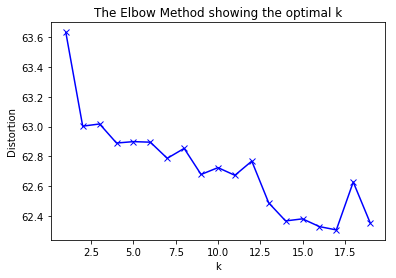

In [17]:
# Provo diversi valori di k e scelgo il migliore, potrebbe richiedere 1/2 miuti 
distortions = []
K = range(1,20)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(distance_matrix)
    distortions.append(sum(np.min(cdist(similarity_matrix, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / similarity_matrix.shape[0])
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [18]:
kmeanModel = KMeans(n_clusters=11).fit(similarity_matrix)
labels = kmeanModel.labels_
counts = np.bincount(labels[labels>=0])
print(counts)

[ 133  390   22   77   65   60 1047   74   47  113   46]


In [19]:
agglomerativeModel = AgglomerativeClustering(n_clusters=11, affinity='cosine', linkage='complete')
# Perchè anche lui fuziona solo con la similarity matrix?
result_clustering = agglomerativeModel.fit_predict(similarity_matrix)
labels = agglomerativeModel.labels_
counts = np.bincount(labels[labels>=0])
print(counts)

[345 679  66  29  81  88  38 443 159  79  67]


#### 2. Associate to each cluster a meta-tag, and consider using it as tag for the music social network.

In [21]:
pd.set_option('mode.chained_assignment', None)
filter_tag['metaTag'] = ''
for index, tag_id in enumerate(similarity_matrix.index):
    filter_tag.loc[filter_tag['tagID']==tag_id, 'metaTag'] = result_clustering[index]
print(filter_tag)

        userID  artistID  tagID  day  month  year  metaTag
0            2        52     13    1      4  2009        8
1            2        52     15    1      4  2009        8
2            2        52     18    1      4  2009        1
3            2        52     21    1      4  2009        8
5            2        63     13    1      4  2009        8
6            2        63     14    1      4  2009        1
7            2        63     23    1      4  2009        4
8            2        63     40    1      4  2009        0
9            2        73     13    1      4  2009        8
10           2        73     14    1      4  2009        1
11           2        73     15    1      4  2009        8
12           2        73     18    1      4  2009        1
13           2        73     20    1      4  2009        8
14           2        73     21    1      4  2009        8
15           2        73     22    1      4  2009        8
16           2        73     26    1      4  2009       

In [22]:
mask = data4.groupby(['userID'])['weight'].transform(max) == data4['weight']
preferred_artist = data4[mask]
del preferred_artist["weight"]
preferred_artist

userID  artistID
36        814       321
47       1432     14522
94        854      8277
160        56      1513
206      1287      1521
237       140      3248
317        25       455
352       428        51
526       583       492
550       550       707
551      1696       227
669      1113       288
696      1161     12795
808        32       851
824       884       295
843       719      2342
865      1898       461
912      1253       289
921      1958     13085
939       392       679
942       313       917
969       889      8403
992      1771       289
1036     1429      1114
1127      998       333
1134     1463     14646
1194     2100      4271
1226     1089        72
1249      341      5851
1260      708      1202
...       ...       ...
82371     156       207
82380    1027        55
82435     571       289
82454     330       679
82458    1538       154
82506     620       518
82520    1732       206
82669      72        67
82688    1890     17424
82712    1846       227
82742    2065       367
82753    1264       959
82778     262      3267
82782    1085      6906
82826      88      1947
82957     220      4440
82989     224      1004
83040     482       615
83076    1626       163
83085     619       207
83150     535       455
83161     126       498
83172    1019       227
83200    1897       475
83320     816      3080
83339     277       190
83389    1879       707
83416    1022       544
83419     393       227
83476    1050       440

[1927 rows x 2 columns]

In [23]:
preferred_artist['metaTag'] = np.NaN
for artist_id in set(filter_tag['artistID']):
    artists = filter_tag[filter_tag['artistID']==artist_id]
    preferred_artist.loc[preferred_artist['artistID']==artist_id, 'metaTag'] = artists['metaTag'].value_counts()[:1].index.tolist()[0]

In [24]:
preferred_music_type = preferred_artist.dropna()
del preferred_music_type['artistID']
print(preferred_music_type)

       userID  metaTag
36        814      7.0
94        854      0.0
160        56      1.0
206      1287      0.0
237       140      1.0
317        25      7.0
352       428      1.0
526       583      1.0
550       550      5.0
551      1696      1.0
669      1113      7.0
696      1161      0.0
808        32      1.0
824       884      7.0
843       719      5.0
865      1898      7.0
912      1253      7.0
921      1958      1.0
939       392      7.0
942       313      5.0
969       889      0.0
992      1771      7.0
1036     1429      7.0
1127      998      7.0
1134     1463      1.0
1194     2100      0.0
1226     1089      1.0
1260      708      1.0
1346     1544      1.0
1428      809      7.0
...       ...      ...
82371     156      1.0
82380    1027      7.0
82435     571      7.0
82454     330      7.0
82458    1538      1.0
82506     620      5.0
82520    1732      1.0
82669      72      7.0
82688    1890      7.0
82712    1846      1.0
82742    2065      7.0
82753    12

#### 3. Group music artists based on the meta-tag and analyse the distribution of the number of artists with respect to the related meta-tags.

## Task3: Social network analysis 

In [25]:
def showGraphFeatures(graph):
    print("Number of nodes in the graph: ", len(graph.nodes()))
    print("Number of edges in the graph: ", len(graph.edges()))
    
def showGraph(graph):
    pos = nx.spring_layout(graph)
    plt.figure(figsize=(8, 8))
    plt.axis("off")
    nx.draw_networkx_nodes(graph, pos, node_size=600, node_color="blue", alpha=0.3)
    nx.draw_networkx_edges(graph, pos, alpha=0.3)
    nx.draw_networkx_labels(graph, pos)
    plt.show(graph)

def showDegreeDistribution(graph):
    degree_dict=dict(nx.degree(graph))

    degree_sequence=list(degree_dict.values())
    degree_sequence=sorted(degree_sequence)
    weights=np.ones_like(degree_sequence)/float(len(degree_sequence))

    plt.hist(degree_sequence, bins=np.arange(np.max(degree_sequence)+1),weights=weights)
    plt.title("Degree Distribution")
    plt.xlabel("Degree")
    plt.ylabel("Frequency")
    plt.show()

def showDegreeCentrality(graph):
    degree_centr = nx.degree_centrality(graph)
    degree_centr_sorted = sorted(((v,k) for k,v in degree_centr.items()), reverse=True)
    print("Central node according to degree centrality is: ", degree_centr_sorted[0][1])
    
def showEigenvectorCentrality(graph):
    eig_centr = nx.eigenvector_centrality(graph)
    eig_centr_sorted  = sorted(((v,k) for k,v in eig_centr.items()), reverse=True)
    print("Central node according to eigenvector centrality is: ", eig_centr_sorted[0][1])
    
def showBetweennessCentrality(graph):
    betw_centr = nx.betweenness_centrality(graph)
    betw_centr_sorted = sorted(((v,k) for k,v in betw_centr.items()), reverse=True)
    print("Central node according to betweenness centrality is: ", betw_centr_sorted[0][1])
    
def showClosenessCentrality(graph):
    close_centr = nx.closeness_centrality(graph)
    close_centr_sorted = sorted(((v,k) for k,v in close_centr.items()), reverse=True)
    print("Central node according to closeness centrality is: ", close_centr_sorted[0][1])

def computeAndShowCommunities(graph):
    partition = community.best_partition(graph)
    print("Number of communities: ", len(set(partition.values())))
    print("Louvain modularity: ", community.modularity(partition, graph))
    #print("Louvain communities: ", friends_partition)
    return partition
    
def showGraphCommunities(graph, partition):
    pos = nx.spring_layout(graph)
    plt.figure(figsize=(8, 8))
    plt.axis("off")
    nx.draw_networkx_nodes(graph, pos, node_size=600, alpha=0.6, cmap=plt.cm.RdYlBu, node_color=list(partition.values()))
    nx.draw_networkx_edges(graph, pos, alpha=0.3)
    nx.draw_networkx_labels(graph, pos)
    plt.show(graph)

def showGlobalClustering(graph):
    print("Global clustering coefficient: ", nx.transitivity(graph))

def showGlobalClusteringOfCommunities(graph, partition):
    for com in sorted(set(partition.values())):
        list_nodes = [nodes for nodes in partition.keys() if partition[nodes] == com] 
        print("Global clustering coefficient for community {} : {}".format(com, nx.transitivity(graph.subgraph(list_nodes))))

def showLocalClustering(graph):
    clust = nx.clustering(graph)
    sorted(((v,k) for k,v in clust.items()), reverse=True)
    print("Average local clustering coefficient of the global network:", np.mean(np.array(list(clust.values()))))

def showLocalClusteringOfCommunities(graph, partition):
    for com in sorted(set(partition.values())):
        list_nodes = [nodes for nodes in partition.keys() if partition[nodes] == com] 
        clust = nx.clustering(graph.subgraph(list_nodes))
        sorted(((v,k) for k,v in clust.items()), reverse=True)
        print("Average local clustering coefficient for community {} : {}".format(com, np.mean(np.array(list(clust.values())))))

def computeJaccardSimilarity(graph):
    pair_similarity=[]
    pairs = nx.jaccard_coefficient(graph)
    for u, v, p in pairs:
        pair_similarity.append((u,v,p))
    return pair_similarity

Number of nodes in the graph:  1892
Number of edges in the graph:  12717


C:\Users\Luca\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


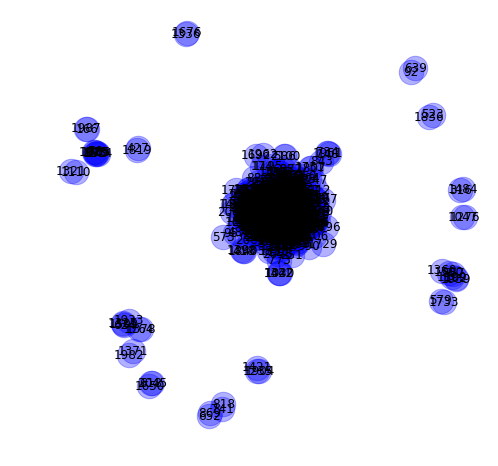

In [26]:
G_friends = nx.Graph()
G_friends.add_edges_from(data3.values)

showGraphFeatures(G_friends)
showGraph(G_friends)

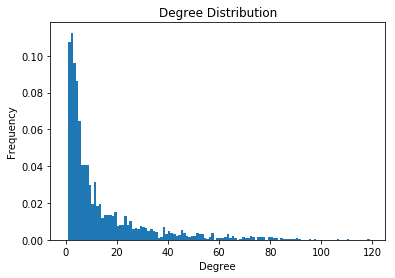

In [27]:
showDegreeDistribution(G_friends)

In [28]:
# identify largest connected component
Gcc = sorted(nx.connected_components(G_friends), key=len, reverse=True)
G_largestConnectedComponent = G_friends.subgraph(Gcc[0])

print("diameter: %d" % nx.diameter(G_largestConnectedComponent))
print("density: %s" % nx.density(G_friends))

diameter: 9
density: 0.007108893467778271


#### 2. Compute the centrality measures, select the one that you consider more representative and justify your choice.

In [29]:
showDegreeCentrality(G_friends)

Central node according to degree centrality is:  1543


In [30]:
showEigenvectorCentrality(G_friends)

Central node according to eigenvector centrality is:  1300


In [31]:
showBetweennessCentrality(G_friends)

Central node according to betweenness centrality is:  1543


In [32]:
showClosenessCentrality(G_friends)

Central node according to closeness centrality is:  831


#### 3.3 Extract the communities based on social network

Number of nodes in the graph:  1892
Number of edges in the graph:  12717


C:\Users\Luca\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


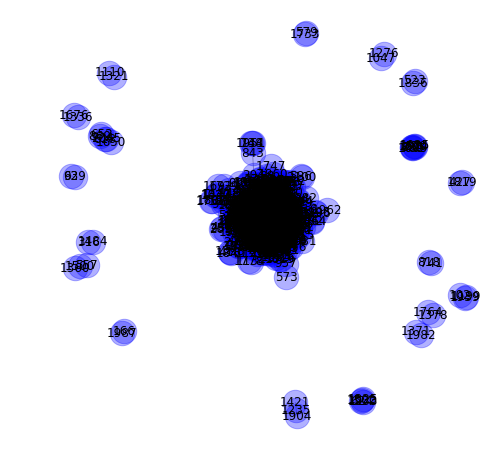

In [33]:
showGraphFeatures(G_friends)
showGraph(G_friends)

Number of communities:  30
Louvain modularity:  0.45272973811264555


C:\Users\Luca\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


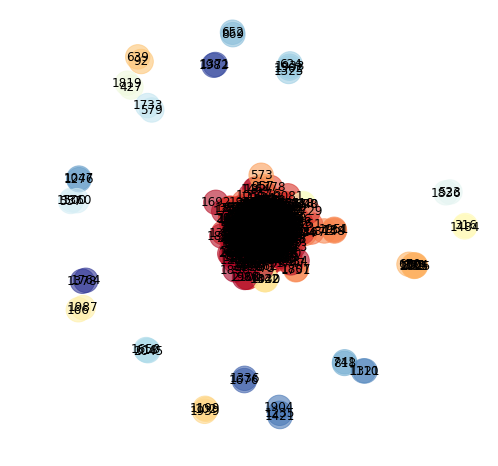

In [34]:
friends_partition = computeAndShowCommunities(G_friends)
showGraphCommunities(G_friends, friends_partition)

#### 3.2 Extract the communities based on similarity (e.g., preferred artist(s), music type). Extract the communities based on similarity: preferred artist(s)

Number of nodes in the graph:  2345
Number of edges in the graph:  1927


C:\Users\Luca\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


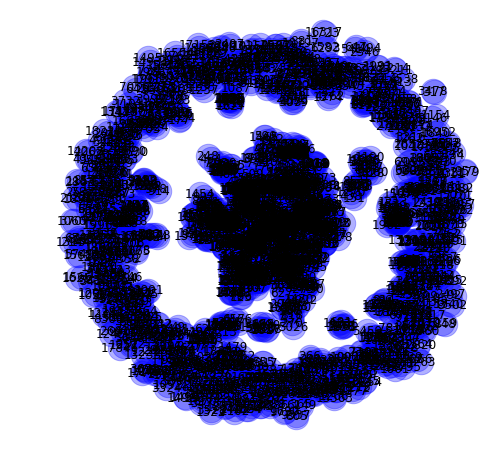

In [35]:
mask = data4.groupby(['userID'])['weight'].transform(max) == data4['weight']
db_user_preferredArtist = data4[mask]
del db_user_preferredArtist["weight"]

G_preferredArtist = nx.Graph()
G_preferredArtist.add_edges_from(db_user_preferredArtist.values)

showGraphFeatures(G_preferredArtist)
showGraph(G_preferredArtist)

Number of communities:  445
Louvain modularity:  0.9676252764029255


C:\Users\Luca\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


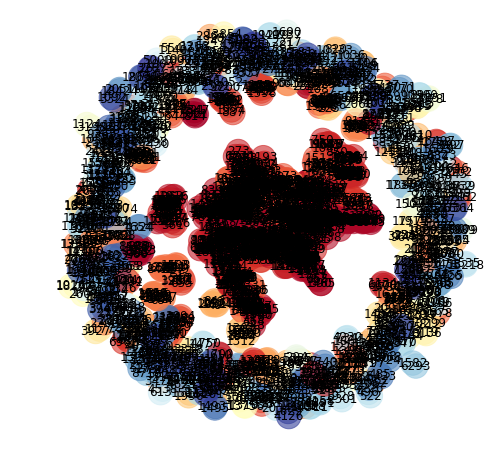

In [36]:
preferredArtist_partition = computeAndShowCommunities(G_preferredArtist)
showGraphCommunities(G_preferredArtist, preferredArtist_partition)

#### Extract the communities based on similarity: preferred music type(s)

Number of nodes in the graph:  1861
Number of edges in the graph:  1864


C:\Users\Luca\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


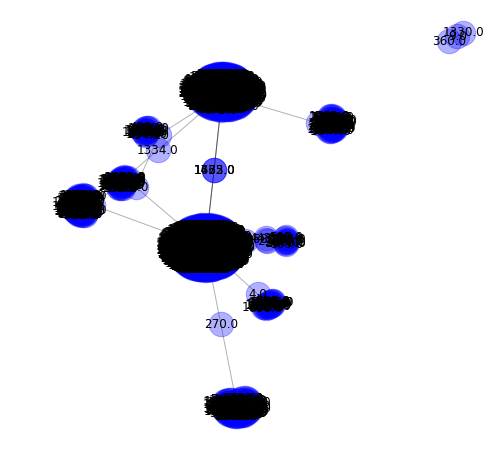

In [37]:
G_preferredMusicType = nx.Graph()
G_preferredMusicType.add_edges_from(preferred_music_type.values)

showGraphFeatures(G_preferredMusicType)
showGraph(G_preferredMusicType)

Number of communities:  10
Louvain modularity:  0.6300696561458121


C:\Users\Luca\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


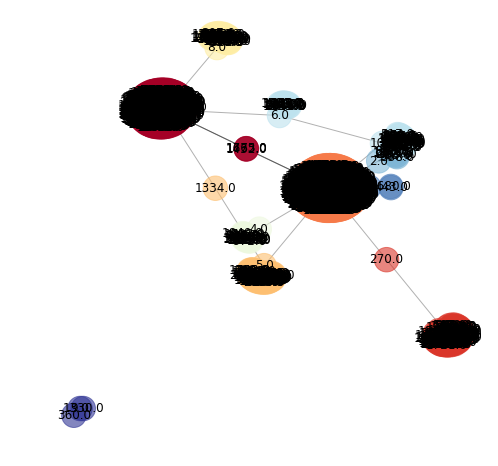

In [38]:
preferredMusicType_partition = computeAndShowCommunities(G_preferredMusicType)
showGraphCommunities(G_preferredMusicType, preferredMusicType_partition)

#### 4. Compute the global clustering coefficient of the:
- global network 
- the communities 
- (OPTIONAL) compare them and discuss the result

In [39]:
showGlobalClustering(G_friends)
showGlobalClustering(G_preferredArtist)
showGlobalClustering(G_preferredMusicType)


Global clustering coefficient:  0.13375631759143525
Global clustering coefficient:  0.0003864236491273266
Global clustering coefficient:  0


In [40]:
showGlobalClusteringOfCommunities(G_friends, friends_partition)
showGlobalClusteringOfCommunities(G_preferredArtist, preferredArtist_partition)
showGlobalClusteringOfCommunities(G_preferredMusicType, preferredMusicType_partition)

Global clustering coefficient for community 0 : 0.2756668874570964
Global clustering coefficient for community 1 : 0.11677199261786253
Global clustering coefficient for community 2 : 0.209762125424776
Global clustering coefficient for community 3 : 0.12485681557846506
Global clustering coefficient for community 4 : 0.1931439733572435
Global clustering coefficient for community 5 : 0.1342234715390021
Global clustering coefficient for community 6 : 0.5948275862068966
Global clustering coefficient for community 7 : 0.4148936170212766
Global clustering coefficient for community 8 : 0.48
Global clustering coefficient for community 9 : 1.0
Global clustering coefficient for community 10 : 0
Global clustering coefficient for community 11 : 1.0
Global clustering coefficient for community 12 : 0.625
Global clustering coefficient for community 13 : 0
Global clustering coefficient for community 14 : 0
Global clustering coefficient for community 15 : 0.75
Global clustering coefficient for community

Global clustering coefficient for community 0 : 0
Global clustering coefficient for community 1 : 0
Global clustering coefficient for community 2 : 0
Global clustering coefficient for community 3 : 0
Global clustering coefficient for community 4 : 0
Global clustering coefficient for community 5 : 0
Global clustering coefficient for community 6 : 0
Global clustering coefficient for community 7 : 0
Global clustering coefficient for community 8 : 0
Global clustering coefficient for community 9 : 0


#### 5. Compute the local clustering coefficients, and extract the average, within: 
- the global network 
- the communities 
- (OPTIONAL) compare them and discuss the result

In [41]:
showLocalClustering(G_friends)
showLocalClustering(G_preferredArtist)
showLocalClustering(G_preferredMusicType)

Average local clustering coefficient of the global network: 0.18654479547922218
Average local clustering coefficient of the global network: 0.000489512270200665
Average local clustering coefficient of the global network: 0.0


In [42]:
showLocalClusteringOfCommunities(G_friends, friends_partition)
showLocalClusteringOfCommunities(G_preferredArtist, preferredArtist_partition)
showLocalClusteringOfCommunities(G_preferredMusicType, preferredMusicType_partition)

Average local clustering coefficient for community 0 : 0.31843561939007126
Average local clustering coefficient for community 1 : 0.22100126455067184
Average local clustering coefficient for community 2 : 0.24084295809596803
Average local clustering coefficient for community 3 : 0.1443148613418212
Average local clustering coefficient for community 4 : 0.22370958786051784
Average local clustering coefficient for community 5 : 0.15175476566373705
Average local clustering coefficient for community 6 : 0.5835600907029479
Average local clustering coefficient for community 7 : 0.3153846153846154
Average local clustering coefficient for community 8 : 0.4293040293040293
Average local clustering coefficient for community 9 : 1.0
Average local clustering coefficient for community 10 : 0.0
Average local clustering coefficient for community 11 : 1.0
Average local clustering coefficient for community 12 : 0.5916666666666667
Average local clustering coefficient for community 13 : 0.0
Average local c

Average local clustering coefficient for community 0 : 0.0
Average local clustering coefficient for community 1 : 0.0
Average local clustering coefficient for community 2 : 0.0
Average local clustering coefficient for community 3 : 0.0
Average local clustering coefficient for community 4 : 0.0
Average local clustering coefficient for community 5 : 0.0
Average local clustering coefficient for community 6 : 0.0
Average local clustering coefficient for community 7 : 0.0
Average local clustering coefficient for community 8 : 0.0
Average local clustering coefficient for community 9 : 0.0


#### Extracting of a DataFrame which identify each user in own community

In [44]:
users_communities = pd.DataFrame()
users_communities['userID'] = friends_partition.keys()
users_communities['community'] = friends_partition.values();
users_communities.to_csv('users_communities.csv', index = True, header = True)

#### 6. Compute the similarity between users according to: 
- Their common friends 
- The artist(s) listened 
- Music type 
- (OPTIONAL) The artist(s) preferred by their friends 
- (OPTIONAL) The type of music listened by their friends

In [45]:
computeJaccardSimilarity(G_friends)
computeJaccardSimilarity(G_preferredArtist)
computeJaccardSimilarity(G_preferredMusicType)

[(0.0, 1.0, 0.0009182736455463728),
 (0.0, 2.0, 0.0),
 (0.0, 3.0, 0.0),
 (0.0, 4.0, 0.0),
 (0.0, 5.0, 0.0),
 (0.0, 6.0, 0.0),
 (0.0, 7.0, 0.0),
 (0.0, 8.0, 0.0),
 (0.0, 9.0, 0.0),
 (0.0, 10.0, 0.0),
 (0.0, 11.0, 0.0),
 (0.0, 12.0, 0.0),
 (0.0, 13.0, 0.0),
 (0.0, 14.0, 0.0),
 (0.0, 15.0, 0.0),
 (0.0, 16.0, 0.0),
 (0.0, 17.0, 0.0),
 (0.0, 20.0, 0.0),
 (0.0, 21.0, 0.0),
 (0.0, 23.0, 0.0),
 (0.0, 24.0, 0.0),
 (0.0, 25.0, 0.0),
 (0.0, 26.0, 0.0),
 (0.0, 27.0, 0.0),
 (0.0, 28.0, 0.0),
 (0.0, 29.0, 0.0),
 (0.0, 30.0, 0.0),
 (0.0, 31.0, 0.0),
 (0.0, 32.0, 0.0),
 (0.0, 33.0, 0.0),
 (0.0, 34.0, 0.0),
 (0.0, 35.0, 0.0),
 (0.0, 36.0, 0.0),
 (0.0, 37.0, 0.0),
 (0.0, 38.0, 0.0),
 (0.0, 39.0, 0.0),
 (0.0, 40.0, 0.0),
 (0.0, 41.0, 0.0),
 (0.0, 42.0, 0.0),
 (0.0, 43.0, 0.0),
 (0.0, 44.0, 0.0),
 (0.0, 45.0, 0.0),
 (0.0, 46.0, 0.0),
 (0.0, 47.0, 0.0),
 (0.0, 48.0, 0.0),
 (0.0, 49.0, 0.0),
 (0.0, 50.0, 0.0),
 (0.0, 51.0, 0.0),
 (0.0, 52.0, 0.0),
 (0.0, 53.0, 0.0),
 (0.0, 54.0, 0.0),
 (0.0, 55.0, 0.0),
 (0

### Task4: Binary classifier for inferring users's artists interest.

Build a binary classifier which is able to infer , given a tuple (user-artist), if the user would be
interested in the artist or not. In order to build the classifier consider a set of features (at least 10
features are expected) which characterize a tuple user-artist. Some examples of features are
listed below, given a tuple of user U and artist A.
- Feature 1: popularity of artist A.
- Feature 2: popularity of the N clusters C(i), which artist A belongs to.
- Feature 3: number of artists listened to by user U, belonging to the same clusters C(i) of
artist A.
- Feature 4: number of friends of user U, which listened to artist A.
- Feature 5: boolean representing if artist A similarity to the user's most listened artists is
lower than a certain distance threshold ​d​.
- Feature 6: the communities computed in Task 3.

#### Feature 1: popularity of artist A.

In [46]:
#calcolo il numero di persone che seguono un artista
cont=0
array=[]
visited=[]
for x in np.array(data2):
    a=x[1] #artist
    b=x[0] #user
    if(a not in visited):
        visited.append(a)
        for y in np.array(data2):
            c=y[1] #artist
            d=y[0] #user
            if a == c:
                cont = cont + 1
        array.append([a,cont])
        cont=0
print(array)



[[1097, 39], [267, 22], [13910, 2], [325, 163], [12657, 1], [2893, 13], [5156, 3], [2215, 1], [441, 130], [2637, 25], [2542, 37], [11991, 1], [11864, 2], [1700, 26], [8277, 4], [245, 25], [292, 369], [1048, 118], [1246, 117], [1673, 39], [3875, 2], [283, 33], [9819, 3], [646, 67], [11915, 1], [17578, 1], [975, 15], [681, 116], [167, 44], [220, 204], [6590, 2], [1196, 20], [2983, 12], [10132, 2], [1452, 35], [321, 77], [1206, 44], [1249, 143], [1244, 89], [56, 134], [349, 218], [329, 126], [298, 224], [547, 39], [707, 204], [915, 40], [14522, 1], [121, 3], [2655, 7], [1639, 61], [15918, 2], [5299, 10], [3289, 14], [18303, 1], [5487, 6], [5180, 5], [701, 292], [288, 443], [320, 89], [877, 27], [499, 61], [9062, 1], [5027, 14], [3264, 14], [1037, 76], [4600, 6], [176, 70], [475, 182], [14494, 1], [5950, 14], [15029, 1], [7, 116], [6150, 10], [816, 70], [1711, 9], [1054, 13], [6915, 5], [1435, 1], [10964, 2], [986, 39], [63, 38], [1160, 9], [546, 71], [25, 25], [1451, 37], [2149, 7], [1185

In [47]:
db_artist_popularity=pd.DataFrame(array,columns=['artistID', 'artistPopularity'])
db_artist_popularity

artistID  artistPopularity
0          1097                39
1           267                22
2         13910                 2
3           325               163
4         12657                 1
5          2893                13
6          5156                 3
7          2215                 1
8           441               130
9          2637                25
10         2542                37
11        11991                 1
12        11864                 2
13         1700                26
14         8277                 4
15          245                25
16          292               369
17         1048               118
18         1246               117
19         1673                39
20         3875                 2
21          283                33
22         9819                 3
23          646                67
24        11915                 1
25        17578                 1
26          975                15
27          681               116
28          167                44
29          220               204
...         ...               ...
16475      9119                 1
16476     17444                 1
16477     17351                 1
16478     13349                 1
16479     10683                 1
16480      2328                 1
16481     15423                 2
16482      9192                 1
16483     15984                 1
16484      9605                 1
16485      1284                 1
16486     14705                 1
16487     14996                 1
16488      4325                 1
16489     12284                 1
16490      1354                 1
16491     18039                 1
16492      6437                 1
16493     10838                 1
16494      9642                 1
16495     15985                 1
16496     10207                 1
16497     18107                 1
16498      9409                 1
16499     16338                 1
16500     18202                 1
16501      3234                 1
16502      5812                 1
16503      9414                 1
16504      6111                 1

[16505 rows x 2 columns]

In [48]:
filter_tag

userID  artistID  tagID  day  month  year  metaTag
0            2        52     13    1      4  2009        8
1            2        52     15    1      4  2009        8
2            2        52     18    1      4  2009        1
3            2        52     21    1      4  2009        8
5            2        63     13    1      4  2009        8
6            2        63     14    1      4  2009        1
7            2        63     23    1      4  2009        4
8            2        63     40    1      4  2009        0
9            2        73     13    1      4  2009        8
10           2        73     14    1      4  2009        1
11           2        73     15    1      4  2009        8
12           2        73     18    1      4  2009        1
13           2        73     20    1      4  2009        8
14           2        73     21    1      4  2009        8
15           2        73     22    1      4  2009        8
16           2        73     26    1      4  2009        1
17           2        94     13    1      4  2009        8
18           2        94     15    1      4  2009        8
19           2        94     20    1      4  2009        8
20           2        94     21    1      4  2009        8
21           2        94     22    1      4  2009        8
23           2        94     37    1      4  2009        0
24           2        94     39    1      4  2009        7
25           2        96     19    1      4  2009        1
26           2        96     24    1      4  2009        7
27           2       995     16    1      5  2009        1
28           2       995     17    1      5  2009        1
29           2       995     24    1      5  2009        7
30           2       995     25    1      5  2009        1
31           2       995     42    1      5  2009        1
...        ...       ...    ...  ...    ...   ...      ...
186444    2099     18714     18    1      7  2009        1
186445    2099     18714    758    1      7  2009        0
186446    2099     18715     13    1     12  2009        8
186447    2099     18715     15    1     12  2009        8
186448    2099     18715     21    1     12  2009        8
186449    2099     18715    758    1     12  2009        0
186450    2099     18716     13    1     10  2009        8
186451    2099     18716     15    1     10  2009        8
186452    2099     18716    758    1     10  2009        0
186453    2099     18717     13    1      2  2010        8
186454    2099     18717     15    1      2  2010        8
186455    2099     18717    758    1      2  2010        0
186456    2099     18719    758    1      2  2010        0
186457    2099     18721     15    1      1  2009        8
186458    2099     18721    758    1      1  2009        0
186459    2099     18723    626    1     11  2010        0
186461    2099     18724     13    1      2  2010        8
186462    2099     18724     15    1      2  2010        8
186463    2099     18724   2525    1      2  2010        8
186464    2100      1111    574    1      3  2009        8
186466    2100      6658      4    1     10  2009        0
186467    2100      6658   2087    1     10  2009        0
186468    2100      6658   2088    1     10  2009        0
186469    2100      8322      4    1      5  2009        0
186470    2100      8322   3510    1      5  2009        0
186473    2100     13978    574    1      6  2009        8
186474    2100     16437      4    1      7  2010        0
186475    2100     16437    292    1      5  2010        4
186476    2100     16437   2087    1      7  2010        0
186478    2100     16437   3335    1      7  2010        0

[174486 rows x 7 columns]

In [49]:
data_user_artist=data1
data_user_artist.rename(columns = {'id':'artistID'}, inplace = True)
#data_user_artist['userID'] =
data_user_artist = pd.merge(data_user_artist, data2, on = 'artistID')
data_user_artist["popularity"] = np.nan
cont=0
for x in data_user_artist.artistID:
    for c in array:
        if c[0] == x:
            data_user_artist["popularity"][cont] = c[1]
    cont = cont + 1


In [50]:
print(data_user_artist.head(20))

    artistID               name  userID  weight  popularity
0          1       MALICE MIZER      34     212         3.0
1          1       MALICE MIZER     785      76         3.0
2          1       MALICE MIZER     274     483         3.0
3          2    Diary of Dreams    1604     455        12.0
4          2    Diary of Dreams    1601     385        12.0
5          2    Diary of Dreams     135    1021        12.0
6          2    Diary of Dreams     257     152        12.0
7          2    Diary of Dreams     560     134        12.0
8          2    Diary of Dreams     580     803        12.0
9          2    Diary of Dreams    2066      83        12.0
10         2    Diary of Dreams     397      56        12.0
11         2    Diary of Dreams    1551     868        12.0
12         2    Diary of Dreams     325    3466        12.0
13         2    Diary of Dreams     935     428        12.0
14         2    Diary of Dreams    1679     161        12.0
15         3  Carpathian Forest     548 

### Feature 2: popularity of the N clusters C(i), which artist A belongs to.

In [51]:
db_metaTag_popularity = pd.DataFrame(columns=['metaTag', 'metaTagPopularity'])

for metaTag in filter_tag['metaTag'].unique():
    # Seleziono gli artisti del metaTag corrente
    artists_per_metaTag = filter_tag[filter_tag['metaTag'] == metaTag]['artistID'].unique()
    # ottengo le popolarità degli artisti selezionati e le sommo per trovare la popolarità del metaTag corrente
    db_metaTag_popularity.loc[len(db_metaTag_popularity)] = [metaTag, db_artist_popularity[db_artist_popularity['artistID'].isin(artists_per_metaTag)]['artistPopularity'].sum()]

db_metaTag_popularity

metaTag metaTagPopularity
0        8             42713
1        1             70949
2        4             36519
3        0             41136
4        7             64909
5       10             21118
6        2             18377
7        9             17058
8        5             26511
9        6              6681
10       3              1345

### Feature 3: number of artists listened to by user U, belonging to the same clusters C(i) of artist A.

In [52]:
user_metaTag_artist_number = pd.DataFrame(columns=['userID', 'metaTag', 'numberOfArtistsListened'])

for userID in filter_tag['userID'].unique(): 
    # Estraggo gli artisti che ascolta l'utente corrente
    artist_per_user = filter_tag[filter_tag['userID'] == userID]
    # Per ogni metaTag conto quanti artisti contiene univocamente e aggiungo l'informazione nel dataset
    print(artist_per_user)
    for metaTag in artist_per_user['metaTag'].unique():
        user_metaTag_artist_number.loc[len(user_metaTag_artist_number)] = [userID, metaTag, len(artist_per_user[artist_per_user['metaTag'] == metaTag]['artistID'].unique())]

user_metaTag_artist_number

    userID  artistID  tagID  day  month  year  metaTag
0        2        52     13    1      4  2009        8
1        2        52     15    1      4  2009        8
2        2        52     18    1      4  2009        1
3        2        52     21    1      4  2009        8
5        2        63     13    1      4  2009        8
6        2        63     14    1      4  2009        1
7        2        63     23    1      4  2009        4
8        2        63     40    1      4  2009        0
9        2        73     13    1      4  2009        8
10       2        73     14    1      4  2009        1
11       2        73     15    1      4  2009        8
12       2        73     18    1      4  2009        1
13       2        73     20    1      4  2009        8
14       2        73     21    1      4  2009        8
15       2        73     22    1      4  2009        8
16       2        73     26    1      4  2009        1
17       2        94     13    1      4  2009        8
18       2

      userID  artistID  tagID  day  month  year  metaTag
417       12        16     61    1      2  2010        6
418       12        16    179    1      2  2010        1
419       12        16    190    1      2  2010        1
420       12        17     61    1      2  2010        6
421       12        18     18    1      8  2010        1
422       12        18     61    1      8  2010        6
423       12        18    179    1      8  2010        1
424       12        36      6    1      5  2010        6
425       12        36     18    1      5  2010        1
426       12        36     30    1      5  2010        8
427       12        36     61    1      5  2010        6
428       12        36    189    1      5  2010        6
429       12        45     18    1      2  2010        1
430       12        45     61    1      2  2010        6
431       12        45     79    1      2  2010        1
432       12        45    181    1      2  2010        0
433       12        56     18  

      userID  artistID  tagID  day  month  year  metaTag
2293      24       786    292    1      9  2008        4
2294      24       896     81    1      9  2009        1
2295      24       901     81    1      9  2009        1
2296      24      7193     39    1     10  2008        7
      userID  artistID  tagID  day  month  year  metaTag
2297      25        67    209    1      1  2008        7
2298      25       155     24    1     11  2009        7
2299      25       155    209    1      1  2008        7
2300      25       157     24    1     11  2009        7
2301      25       157    209    1     11  2009        7
2302      25       157    401    1      6  2009        9
2305      25       192    209    1      1  2008        7
2306      25       289     24    1     12  2008        7
2307      25       289    209    1      1  2008        7
2308      25       292     24    1      6  2010        7
2309      25       292    209    1      1  2008        7
2310      25       292    400  

      userID  artistID  tagID  day  month  year  metaTag
2945      32      1093    285    1      8  2010        7
2947      32      1094    199    1      8  2010        7
2948      32      1094    398    1      8  2010        1
2949      32      1095    500    1      8  2010        1
2950      32      1103    134    1      8  2010        4
2951      32      1103    216    1      8  2010        7
2952      32      1103    524    1      8  2010        5
      userID  artistID  tagID  day  month  year  metaTag
2954      33       183     85    1      7  2007        9
2955      33       188     76    1      4  2008        5
2956      33       233     61    1     11  2006        6
2957      33       234    170    1     11  2006        1
2958      33       418     87    1     11  2009        8
2959      33       614    170    1     11  2006        1
2960      33       964    387    1     11  2006        1
2961      33      1109     87    1      6  2010        8
2963      33      1110    387  

      userID  artistID  tagID  day  month  year  metaTag
3784      42      1389    508    1      1  2008        7
      userID  artistID  tagID  day  month  year  metaTag
3785      43        45     61    1     10  2010        6
3786      43        45     79    1     10  2010        1
3787      43        48    321    1     11  2010        0
3788      43        51     16    1     10  2010        1
3789      43        51     25    1     10  2010        1
3790      43        52     13    1      5  2010        8
3791      43        52     15    1      5  2010        8
3792      43        52     21    1      5  2010        8
3793      43        52     39    1      5  2010        7
3794      43        52    130    1      5  2010        7
3795      43        59     16    1     11  2010        1
3796      43        63     13    1     10  2010        8
3797      43        63     14    1     10  2010        1
3798      43        64     13    1     11  2010        8
3799      43        64     15  

      userID  artistID  tagID  day  month  year  metaTag
6266      53        89    658    1      3  2010        7
6267      53       289    636    1      8  2009        7
6268      53       300    657    1      3  2010        7
      userID  artistID  tagID  day  month  year  metaTag
6269      54       289     24    1      9  2007        7
6270      54       289    209    1     10  2007        7
6271      54       289    346    1     10  2007        7
6272      54       289    754    1     10  2007        0
      userID  artistID  tagID  day  month  year  metaTag
6273      55       567    625    1      3  2010        7
6274      55       614     78    1      6  2009        1
6275      55       614    170    1      6  2009        1
6276      55       622    134    1      6  2009        4
6277      55       622    757    1      6  2009        1
6278      55       854     78    1      6  2009        1
6279      55       854    170    1      6  2009        1
6280      55       856    170  

      userID  artistID  tagID  day  month  year  metaTag
7358      62        51     16    1     11  2009        1
7359      62        51     17    1     11  2009        1
7360      62        51     18    1     11  2009        1
7361      62        51     25    1     11  2009        1
7362      62        51     56    1     11  2009        1
7363      62        51    195    1     11  2009        1
7364      62        51    213    1     11  2009        1
7365      62        51    230    1     11  2009        7
7366      62        51    231    1     11  2009        7
7367      62        51    395    1     11  2009        1
7368      62        51    508    1     11  2009        7
7369      62        51    662    1     11  2009        7
7370      62        51    801    1     11  2009        1
7371      62        51    831    1     11  2009        7
7372      62        51    835    1     11  2009        1
7373      62        53     15    1     12  2009        8
7374      62        53     18  

      userID  artistID  tagID  day  month  year  metaTag
9182      74      2044    184    1      3  2009        8
9183      74      2044    503    1      4  2010        1
9184      74      2044    608    1      4  2009        0
9185      74      2044    977    1      3  2009        7
9186      74      2044    978    1      4  2010        7
9191      74      2044    989    1      8  2009        7
9193      74      2044    991    1      3  2009        7
9196      74      2049    977    1      3  2009        7
9197      74      2050    977    1      3  2009        7
9200      74      7109    977    1      3  2009        7
9201      74     13440    977    1     12  2009        7
      userID  artistID  tagID  day  month  year  metaTag
9202      75        67    130    1     11  2010        7
9203      75        89     24    1     10  2010        7
9204      75        89     39    1     10  2010        7
9205      75        89    130    1     10  2010        7
9206      75       230     73  

      userID  artistID  tagID  day  month  year  metaTag
9685      86      2214    180    1      1  2011        1
9686      86      2214    309    1      1  2011        1
9687      86      2214    376    1      1  2011        0
9688      86      2214   1079    1      1  2011        0
      userID  artistID  tagID  day  month  year  metaTag
9689      87        67     18    1      4  2010        1
9690      87        67     24    1      4  2010        7
9691      87        67     25    1      4  2010        1
9692      87        67     39    1      4  2010        7
9693      87        67    130    1      4  2010        7
9694      87       294     24    1      4  2010        7
9695      87       294    130    1      4  2010        7
9696      87       294    167    1      4  2010        7
9697      87       294    625    1      4  2010        7
9698      87       300     24    1      4  2010        7
9699      87       300     73    1      4  2010        1
9700      87       300    109  

       userID  artistID  tagID  day  month  year  metaTag
10497     100        59     16    1      1  2009        1
10498     100        59     18    1      1  2009        1
10499     100        59     39    1      1  2009        7
10500     100        59    275    1      1  2009        1
10501     100        59    296    1      1  2009        1
       userID  artistID  tagID  day  month  year  metaTag
10502     101         8      1    1      1  2011        5
10503     101         8    139    1      1  2011        0
10504     101         8    141    1      1  2011        0
10505     101         8    541    1      1  2011        7
10506     101         8   1219    1      1  2011        0
10507     101       209     73    1     12  2010        1
10508     101       209     79    1      2  2011        1
10509     101       209    182    1      2  2011        0
10510     101       226     72    1     12  2010        2
10511     101       226     73    1     12  2010        1
10512     101 

       userID  artistID  tagID  day  month  year  metaTag
11726     109       179     78    1      4  2009        1
11727     109       253     25    1     12  2010        1
11729     109       724    386    1     12  2010        5
11730     109       732     25    1      4  2009        1
11731     109       732     72    1      4  2009        2
11732     109       732     73    1      4  2009        1
11733     109       732    192    1      6  2009        1
11734     109       732    352    1      7  2009        7
11735     109       732    386    1     12  2010        5
11736     109       732    843    1      2  2009        1
11737     109       735    192    1     12  2010        1
11738     109       868    192    1     12  2010        1
11739     109       868    247    1     12  2010        1
11740     109       959    192    1     12  2010        1
11741     109      1079     25    1     12  2010        1
11742     109      1091    182    1      2  2009        0
11743     109 

       userID  artistID  tagID  day  month  year  metaTag
12715     123        88     18    1      3  2010        1
12716     123        88     81    1      3  2010        1
12717     123        88    296    1      3  2010        1
12718     123       154     79    1      7  2009        1
12719     123       210     81    1      9  2009        1
12720     123       754    180    1      7  2009        1
12721     123       754    194    1      7  2009        0
12722     123       777   1430    1      7  2009        8
12723     123       779    194    1      8  2009        0
12724     123       816    194    1      9  2009        0
12725     123      1099     33    1      7  2009        1
12726     123      1099     83    1      7  2009        1
12728     123      1541    194    1      9  2009        0
12729     123      1801     13    1      7  2009        8
12730     123      1801     15    1      7  2009        8
12731     123      1801     20    1      7  2009        8
12732     123 

       userID  artistID  tagID  day  month  year  metaTag
13138     135        32     18    1      6  2008        1
13139     135        32    600    1      6  2008        6
13140     135        34    600    1      6  2008        6
13141     135      1066    130    1      6  2008        7
13142     135      1066    600    1      6  2008        6
13143     135      1297     18    1      6  2008        1
13144     135      1297    600    1      6  2008        6
13145     135      1300     18    1      7  2008        1
13146     135      1300     30    1      7  2008        8
13147     135      1300   1481    1      7  2008        8
13148     135      1301     18    1      5  2008        1
13149     135      1301     90    1      5  2008        8
13150     135      1301    600    1      5  2008        6
13151     135      1322     74    1      6  2008        1
13152     135      1322    600    1      6  2008        6
13153     135      1328     18    1      6  2008        1
13154     135 

       userID  artistID  tagID  day  month  year  metaTag
13616     146       344     49    1      8  2009        7
13617     146       344    193    1      8  2009        7
13618     146       344    683    1      8  2009        7
13619     146       344    791    1      8  2009        7
13620     146       349     24    1      8  2009        7
13621     146       349     39    1      8  2009        7
       userID  artistID  tagID  day  month  year  metaTag
13622     147        67     24    1     10  2006        7
13623     147       155     24    1     10  2006        7
13624     147       209    176    1     10  2006        1
13625     147       220     73    1     10  2006        1
13626     147       230    182    1     10  2006        0
13627     147       257    167    1     10  2006        7
13628     147       288    167    1     10  2006        7
13629     147       289     24    1      7  2006        7
13630     147       289     39    1     10  2006        7
13631     147 

       userID  artistID  tagID  day  month  year  metaTag
15145     157       176    386    1      7  2010        5
15146     157       990     75    1      7  2010        1
15147     157      1110    387    1      7  2010        1
15148     157      1372     72    1      7  2010        2
15150     157      1810    848    1      7  2010        2
15151     157      2834   1210    1      8  2010        1
15152     157      3470    192    1      7  2010        1
15153     157      6165    445    1      7  2010        1
       userID  artistID  tagID  day  month  year  metaTag
15155     158      3484    167    1      2  2011        7
15156     158      3484   1316    1      2  2011        7
15158     158      3490    167    1      2  2011        7
15159     158      3490    511    1      2  2011        7
15161     158      3492     24    1     10  2010        7
       userID  artistID  tagID  day  month  year  metaTag
15163     159         7      1    1      1  2009        5
15164     159 

       userID  artistID  tagID  day  month  year  metaTag
16671     171        65     73    1      1  2011        1
16672     171        65     78    1      1  2011        1
16673     171        65     79    1      1  2011        1
16674     171        65     81    1      1  2011        1
16675     171        65    127    1      1  2011        1
16676     171        65    195    1      1  2011        1
16677     171        65    389    1      1  2011        1
16678     171        69    130    1      1  2011        7
16679     171        69    625    1      1  2011        7
16680     171        84     18    1      1  2011        1
16681     171        84     81    1      1  2011        1
16682     171        84    187    1      1  2011        1
16683     171        84    309    1      1  2011        1
16684     171        88     18    1      1  2011        1
16685     171        88     73    1      1  2011        1
16686     171        88     79    1      1  2011        1
16687     171 

       userID  artistID  tagID  day  month  year  metaTag
17452     184        70   1943    1     12  2010        8
17453     184        81   1849    1      1  2011        8
17454     184       204    513    1     12  2010        1
17455     184       378    513    1      1  2011        1
17457     184       418     90    1      1  2011        8
17458     184       418    513    1      1  2011        1
17459     184       418   1849    1     12  2010        8
17460     184       418   1943    1     12  2010        8
17461     184       418   1945    1     12  2010        8
17462     184       418   1946    1      1  2011        8
17463     184       444   1945    1     12  2010        8
17464     184       454   1943    1     11  2010        8
17465     184       506   1849    1     12  2010        8
17466     184       506   1943    1     12  2010        8
17467     184       518    513    1      1  2011        1
17468     184       518   1946    1      1  2011        8
17470     184 

       userID  artistID  tagID  day  month  year  metaTag
18544     193        56     39    1      3  2008        7
18545     193        56    187    1      3  2008        1
18546     193        56    213    1      3  2008        1
18547     193        56    234    1      3  2008        7
18548     193        56    309    1      3  2008        1
18549     193        56    570    1      3  2008        7
18550     193        56   1447    1      3  2008        7
18551     193        56   1530    1      3  2008        4
18552     193        56   1911    1      3  2008        7
18553     193        56   1990    1      3  2008        1
18554     193        72     90    1      4  2008        8
18555     193        72    285    1      4  2008        7
18556     193        72   1990    1      4  2008        1
18558     193      4023    304    1      6  2008       10
18559     193      4387    187    1      3  2008        1
18560     193      4387    228    1      3  2008        7
18561     193 

       userID  artistID  tagID  day  month  year  metaTag
19519     207      2840   1990    1     11  2010        1
       userID  artistID  tagID  day  month  year  metaTag
19522     208        28      4    1     12  2010        0
19523     208       841     91    1     12  2010        5
19524     208      1254   2091    1     12  2010        0
19525     208      1254   2092    1     12  2010        0
19526     208      1260      4    1     12  2010        0
19527     208      1276   2092    1      1  2011        0
19528     208      1281    742    1     12  2010        0
19529     208      1358    386    1     12  2010        5
19530     208      1358    415    1     12  2010        5
19531     208      1360    386    1     12  2010        5
19532     208      1521   1279    1     12  2010        0
19533     208      1522     91    1     12  2010        5
19535     208      2746   1372    1      2  2011        0
19536     208      4265      5    1     12  2010        0
19537     208 

       userID  artistID  tagID  day  month  year  metaTag
19786     216        72     16    1      7  2007        1
19787     216        72     25    1      7  2007        1
19788     216        72     74    1      7  2007        1
19789     216        72     79    1      7  2007        1
       userID  artistID  tagID  day  month  year  metaTag
19790     217         7   2139    1     10  2008        5
19792     217        15   2139    1     10  2008        5
19793     217        36   2140    1     11  2007        5
19794     217        90   2138    1     11  2007        0
19795     217       175   2137    1     11  2008        9
19796     217       197   2142    1      8  2007        1
19797     217       198   2140    1     11  2007        5
19798     217       198   2142    1      8  2007        1
19799     217       202   2142    1      8  2007        1
19800     217       209   2139    1     10  2008        5
19801     217       217   2142    1      8  2007        1
19802     217 

       userID  artistID  tagID  day  month  year  metaTag
22873     229         7     73    1      6  2009        1
22874     229        16     61    1      7  2009        6
22875     229        30     61    1      7  2009        6
22876     229        38      4    1      8  2009        0
22877     229        39    179    1      7  2009        1
22878     229        39    575    1      7  2009        1
22879     229        65     81    1      6  2009        1
22880     229        69     24    1      9  2009        7
22881     229        69    130    1      9  2009        7
22882     229        70     79    1      7  2009        1
22883     229        72     25    1      7  2009        1
22884     229       154     18    1      7  2009        1
22885     229       154     78    1      7  2009        1
22886     229       159     25    1      9  2009        1
22887     229       159     73    1      9  2009        1
22888     229       166     78    1      6  2009        1
22889     229 

       userID  artistID  tagID  day  month  year  metaTag
25356     238      4625     32    1      4  2009        1
25357     238      4625     33    1      4  2009        1
25358     238      4625     73    1      8  2008        1
25359     238      4625     81    1      8  2008        1
25360     238      4625     83    1      8  2008        1
25361     238      4625    191    1      4  2009        8
25362     238      4625    608    1      5  2009        0
25365     238      4625   2280    1      5  2009        0
25366     238      4625   2281    1      8  2008        0
25367     238      4625   2282    1      5  2009        0
25368     238      4625   2283    1      8  2008        0
25369     238      4625   2284    1      5  2009        0
25370     238      4625   2288    5      5  2011        7
25378     238      4626     81    1      8  2008        1
25379     238      4626    608    1      5  2009        0
25380     238      4626   2280    1      5  2009        0
25381     238 

       userID  artistID  tagID  day  month  year  metaTag
26221     253       289     24    1      9  2009        7
26222     253       289     39    1      8  2009        7
26223     253       289    130    1      9  2009        7
26224     253       289    209    1      9  2009        7
26225     253       802     24    1      8  2009        7
26226     253       802     39    1      9  2009        7
26227     253       802    130    1      8  2009        7
26228     253       802    238    1      8  2009        7
26229     253       802    299    1     12  2010        4
26230     253       802    308    1      8  2009        7
26231     253       802    356    1      8  2009        7
26232     253       802    511    1     11  2009        7
26233     253       802    639    1     12  2010        7
26234     253       802    823    1     12  2010        0
26240     253      5226    311    1      9  2009        0
26241     253      5226    823    1      9  2009        0
       userID 

       userID  artistID  tagID  day  month  year  metaTag
28106     266        65   2463    1      9  2008        1
28107     266       154   2463    1      8  2008        1
28108     266       182    839    1     12  2008        1
28110     266       203   2463    1      8  2008        1
28111     266       221   2463    1      8  2008        1
28112     266       229   2463    1      8  2008        1
28113     266       533    389    1      7  2008        1
28115     266       733   2463    1      9  2008        1
28116     266       857   2463    1      9  2008        1
28117     266       959   2463    1      9  2008        1
28118     266      1384    213    1      7  2008        1
28119     266      1384    389    1      7  2008        1
28120     266      1384   2463    1      8  2008        1
28121     266      1405    508    1     11  2007        7
28122     266      4996    231    1      9  2008        7
28123     266      4996    389    1      9  2008        1
28124     266 

       userID  artistID  tagID  day  month  year  metaTag
28375     275       907    285    1     10  2008        7
28376     275      3617    285    1      2  2009        7
28377     275      3617    824    1      2  2009        1
       userID  artistID  tagID  day  month  year  metaTag
28381     277       190    387    1      3  2009        1
28382     277      1412    387    1      3  2009        1
28383     277      1632    275    1     10  2010        1
28384     277      1788    275    1      2  2009        1
28386     277      5708    512    1     12  2008        7
       userID  artistID  tagID  day  month  year  metaTag
28388     278        67    238    1      4  2009        7
28389     278        67    364    1      4  2009        7
28390     278        67    661    1      7  2009        9
28391     278       157     39    1      6  2009        7
28392     278       157    401    1      6  2009        9
28393     278       157    527    1      6  2009        7
28394     278 

       userID  artistID  tagID  day  month  year  metaTag
29030     292       163     75    1      3  2009        1
29031     292       163    387    1      3  2009        1
29032     292       163   2244    1     11  2009        1
29036     292       227     73    1      5  2010        1
29038     292      3481    387    1      5  2010        1
29039     292      5296   2244    1      5  2010        1
       userID  artistID  tagID  day  month  year  metaTag
29046     293      5319      1    1      8  2010        5
       userID  artistID  tagID  day  month  year  metaTag
29048     294      5336    564    1     10  2006        8
       userID  artistID  tagID  day  month  year  metaTag
29049     295       503      5    1      1  2007        0
29051     295       928    615    1      1  2007        5
29052     295       936    615    1      1  2007        5
29053     295       942    386    1      1  2007        5
29054     295       949      5    1      1  2007        0
29055     295 

       userID  artistID  tagID  day  month  year  metaTag
30322     300       705     73    1      6  2008        1
30323     300       705    432    1      6  2008        0
       userID  artistID  tagID  day  month  year  metaTag
30325     301        55    730    1      6  2010        7
30326     301        55   1495    1      6  2010        7
30327     301       228   1495    1      4  2010        7
       userID  artistID  tagID  day  month  year  metaTag
30329     302        89     18    1     11  2010        1
30330     302        89     24    1     11  2010        7
30331     302        89     39    1     11  2010        7
30332     302        89    130    1     12  2010        7
30333     302        89    199    1     12  2010        7
30334     302        89    206    1     11  2010        7
30335     302        89    231    1     12  2010        7
30336     302        89    232    1     12  2010        7
30337     302        89    658    1     12  2010        7
30338     302 

       userID  artistID  tagID  day  month  year  metaTag
31071     318       300    193    1     12  2010        7
31072     318       525    304    1     10  2010       10
31073     318       701    206    1      8  2010        7
31074     318       701    208    1      8  2010        7
31075     318       701    209    1      8  2010        7
31076     318       701    213    1      8  2010        1
31077     318       701    238    1      8  2010        7
31078     318       701    304    1      9  2010       10
31079     318       701    354    1      8  2010        7
31080     318       701    483    1      9  2010        7
31081     318       701    508    1      8  2010        7
31082     318       701    723    1     12  2010        7
31083     318       701    774    1      8  2010        7
31084     318       701    799    1      8  2010        1
31085     318       701   1382    1      9  2010        7
31086     318       701   1753    1     12  2010        7
31087     318 

       userID  artistID  tagID  day  month  year  metaTag
31542     326        55     39    1      4  2009        7
31543     326        65     73    1      4  2009        1
31544     326        65    195    1      4  2009        1
31545     326        89    833    1      4  2009        1
31547     326       257    508    1      4  2009        7
31548     326       257    512    1      4  2009        7
31549     326       257    825    1      4  2009        1
31550     326       257   2349    1      4  2009        7
31551     326       257   2806    1      4  2009        7
31552     326       283    508    1      4  2009        7
31553     326       283    693    1      4  2009        0
31554     326       283   1753    1      4  2009        7
31555     326       283   2103    1      4  2009        7
31556     326       288    825    1      4  2009        1
31557     326       292     24    1      4  2009        7
31558     326       293     24    1      4  2009        7
31559     326 

       userID  artistID  tagID  day  month  year  metaTag
32355     342       157     85    1      6  2009        9
32356     342       163     75    1      8  2009        1
32357     342       173     79    1      6  2009        1
32358     342       173    389    1      6  2009        1
32359     342       599     80    1      7  2009        1
32360     342       599    192    1      7  2009        1
32361     342      1117    527    1      6  2009        7
32362     342      2346    192    1      6  2009        1
       userID  artistID  tagID  day  month  year  metaTag
32364     343       234    170    1      5  2010        1
32365     343       707     91    1      8  2009        5
32368     343       917    415    1      8  2009        5
32369     343      5896    409    1      7  2010        2
       userID  artistID  tagID  day  month  year  metaTag
32376     345      7324    203    1     10  2009        7
32377     345      7324    210    1     10  2009        7
32378     345 

       userID  artistID  tagID  day  month  year  metaTag
32557     352        89     17    1      7  2009        1
32558     352        89     18    1      7  2009        1
32559     352        89     39    1      7  2009        7
32560     352        89     73    1      7  2009        1
32561     352        89    199    1      7  2009        7
32562     352        89    232    1      7  2009        7
32563     352        89    509    1      7  2009        7
32564     352        89    658    1      7  2009        7
32565     352        89   1727    1      7  2009        7
32566     352        89   2346    1      7  2009        7
32567     352        89   2726    1      7  2009        1
32571     352       288     24    1      7  2009        7
32572     352       307   1880    1      7  2009        1
32573     352       349     24    1      7  2009        7
32574     352       349     39    1      7  2009        7
32575     352       349    167    1      7  2009        7
32577     352 

       userID  artistID  tagID  day  month  year  metaTag
34181     366      1404     14    5      5  2011        1
34182     366      1404     15    5      5  2011        8
34183     366      1404     18    5      5  2011        1
34184     366      1404     33    5      5  2011        1
34185     366      1404     47    5      5  2011        8
34186     366      1404    187    5      5  2011        1
34187     366      1404   1846    5      5  2011        8
34189     366      1404   3080    5      5  2011        8
34190     366      1404   3081    5      5  2011        8
34194     366      6184     14    1      2  2008        1
34195     366      6184     33    1      6  2009        1
34196     366      6184     79    1      1  2007        1
34197     366      6184     81    1      1  2007        1
34198     366      6184     84    1      1  2007        1
34199     366      6184    191    1      2  2008        8
34200     366      6184    391    1      9  2009        0
34201     366 

       userID  artistID  tagID  day  month  year  metaTag
34783     376       707     91    1      8  2010        5
34784     376       707    386    1      8  2010        5
34785     376       917    386    1      7  2010        5
34786     376       917    415    1      8  2010        5
34787     376       922    195    1      8  2010        1
34788     376       922    386    1      8  2010        5
34789     376       922    415    1      8  2010        5
       userID  artistID  tagID  day  month  year  metaTag
34790     377        15      4    1      5  2008        0
34791     377        15      5    1      9  2006        0
34792     377        15   1532    1      9  2006        0
34793     377        15   3135    1      9  2006        5
34794     377        25      5    1      9  2006        0
34795     377        25   1532    1      9  2006        0
34796     377       503      5    1      9  2006        0
34797     377       503    385    1     11  2006        0
34798     377 

       userID  artistID  tagID  day  month  year  metaTag
38138     394       261    693    1      4  2008        0
38140     394      3746    311    1      3  2008        0
38143     394      6475    311    1      3  2008        0
38144     394     16103    311    1      8  2008        0
       userID  artistID  tagID  day  month  year  metaTag
38145     395         7     61    1      8  2009        6
38146     395        63     13    1      3  2011        8
38147     395        63     14    1      3  2011        1
38148     395       188     76    1      3  2011        5
38149     395       188   1889    1      3  2011        0
38150     395       370     76    1      3  2011        5
38151     395       370     82    1      3  2011        0
38152     395       377     24    1      7  2009        7
38153     395       447    311    1      7  2009        0
38154     395       517     79    1      3  2011        1
38155     395       517    177    1      3  2011        1
38156     395 

       userID  artistID  tagID  day  month  year  metaTag
38897     399       291    109    1      5  2010        7
38898     399       291   1395    1      5  2010        7
38899     399       292     24    1      4  2010        7
38900     399       292     49    1      5  2010        7
38901     399       292    130    1      4  2010        7
38902     399       292    346    1      4  2010        7
38903     399       292    667    1      5  2010        7
38904     399       300     24    1      5  2010        7
38905     399       300    130    1      5  2010        7
38906     399       300    210    1      5  2010        7
38907     399       311     24    1      3  2010        7
38908     399       311    130    1      3  2010        7
38909     399       311    346    1      3  2010        7
38910     399       344     49    1      4  2010        7
38911     399       344    130    1      4  2010        7
38912     399       344    193    1      4  2010        7
38914     399 

       userID  artistID  tagID  day  month  year  metaTag
40154     413        67     19    1      2  2009        1
40155     413        67    209    1      2  2011        7
40156     413        67    319    1      5  2009        7
40157     413        67    358    1      5  2010        7
40160     413        67   3332    1      5  2010        7
40161     413       295   2806    1      6  2009        7
40163     413       301    208    1      5  2010        7
40165     413       304   1753    1      5  2010        7
40166     413       526     74    1      6  2010        1
40167     413      6646    208    1      7  2010        7
       userID  artistID  tagID  day  month  year  metaTag
40177     414       283     39    1      2  2010        7
40178     414       283    130    1      2  2010        7
40179     414       283    209    1      2  2010        7
40180     414       283    432    1      2  2010        0
40181     414       283    636    1      2  2010        7
40182     414 

       userID  artistID  tagID  day  month  year  metaTag
40478     423        51     25    1      6  2006        1
40479     423        51    195    1      6  2006        1
40480     423        51   1048    1      4  2007        1
40481     423        51   1100    1      6  2006        1
40482     423        68    709    1      4  2007        1
40483     423        72     18    1      6  2006        1
40484     423        72    195    1      6  2006        1
40485     423        72   1048    1      4  2007        1
40486     423        72   3215    1      4  2007        7
40489     423        80     39    1      6  2006        7
40490     423        80    195    1      6  2006        1
40491     423        80    210    1      6  2006        7
40492     423        85    709    1      4  2007        1
40493     423        85   1048    1      4  2007        1
40494     423        98    709    1      4  2007        1
40495     423       100    195    1      4  2007        1
40496     423 

       userID  artistID  tagID  day  month  year  metaTag
41566     438        30     61    1     10  2010        6
41567     438      8149     74    1     10  2010        1
       userID  artistID  tagID  day  month  year  metaTag
41568     439        63    370    6      5  2011        7
41569     439        67    370    1     12  2009        7
41570     439        88   1911    1     12  2008        7
41571     439        89   3540    6      5  2011       10
41572     439       198    370    1      3  2011        7
41573     439       248     92    1     11  2009       10
41574     439       248    103    1      8  2009       10
41575     439       248    228    1      6  2009        7
41576     439       248    285    1     11  2007        7
41577     439       248    287    1      6  2009        7
41578     439       248    702    1      1  2009       10
41579     439       248   2511    1     11  2007       10
41580     439       248   2640    1     11  2007       10
41581     439 

       userID  artistID  tagID  day  month  year  metaTag
43982     449      7043    190    1     11  2010        1
43983     449      7043    424    1      1  2010        1
43984     449      9209     82    1     11  2010        0
       userID  artistID  tagID  day  month  year  metaTag
43985     450       212    185    1      6  2008        4
43986     450       212    247    1      6  2008        1
43987     450       855     79    1      7  2008        1
43988     450       868     73    1      6  2008        1
43989     450       868     75    1      6  2008        1
43990     450       868     88    1      6  2008        1
43991     450       956    191    1      8  2008        8
43992     450       956    409    1      8  2008        2
43993     450       956    830    1      8  2008        1
43994     450      1412     13    1      6  2008        8
43995     450      1412     56    1      7  2008        1
43996     450      1412     72    1      7  2008        2
43997     450 

       userID  artistID  tagID  day  month  year  metaTag
45285     460        53   3708    1      9  2008        8
45286     460       418    955    1      9  2008        1
45287     460       418   2204    1      9  2008        1
45288     460       418   3708    1      9  2008        8
45289     460       603     67    1      9  2008        0
45291     460       603   3709    1      9  2008        8
45292     460       726     26    1      9  2008        1
45293     460       726    191    1      9  2008        8
45294     460       726    803    1      9  2008        6
45295     460       726    836    1      9  2008        1
45296     460       726   1797    1      9  2008        7
45297     460       726   3708    1      9  2008        8
45298     460       755     47    1      9  2008        8
45299     460       755    750    1      9  2008        1
45300     460       755   1538    1      9  2008        1
45303     460      1098     32    1      9  2008        1
45304     460 

       userID  artistID  tagID  day  month  year  metaTag
46460     486       157    209    1     11  2010        7
46461     486       157    401    1     11  2010        9
46462     486       157    526    1      5  2010        1
46465     486       157   2691    1      5  2010        9
46467     486       289    209    1     11  2010        7
46468     486       292    209    1     11  2010        7
46469     486       701    209    1     11  2010        7
       userID  artistID  tagID  day  month  year  metaTag
46472     487       326   3825    1      7  2007        7
       userID  artistID  tagID  day  month  year  metaTag
46477     488        51     16    1      8  2009        1
46478     488        51     25    1      8  2009        1
46479     488        51   3830    1     12  2009        8
46480     488       154     14    1      8  2009        1
46481     488       154     33    1      4  2010        1
46482     488       154    191    1      8  2009        8
46483     488 

       userID  artistID  tagID  day  month  year  metaTag
47833     493        72     16    1     10  2008        1
47834     493        72     18    1      5  2008        1
47835     493       190     79    1      5  2009        1
47836     493       190    195    1      5  2009        1
47837     493       234    170    1      5  2009        1
47838     493      1061     18    1      5  2008        1
47839     493      1072     18    1      5  2008        1
47840     493      1072     79    1      5  2009        1
47841     493      1072    134    1      5  2009        4
47842     493      1072    195    1      5  2009        1
47844     493      1713     18    1      5  2009        1
47845     493      1713    134    1      5  2009        4
47846     493      1713    195    1      5  2009        1
47848     493      5483    195    1      5  2008        1
47850     493      5486     16    1      1  2009        1
47852     493      7444     18    1      3  2011        1
47853     493 

       userID  artistID  tagID  day  month  year  metaTag
49167     509       966     72    1      6  2009        2
49168     509       966     73    1      6  2009        1
49169     509       966     78    1      6  2009        1
       userID  artistID  tagID  day  month  year  metaTag
49170     510       288    130    1      3  2008        7
49171     510       288    167    1      3  2008        7
49172     510       486     73    1      3  2008        1
49173     510       486     78    1      3  2008        1
49174     510       486     79    1      3  2008        1
49175     510       486    762    1      3  2008        1
49176     510       680    109    1      3  2008        7
49177     510       680    130    1      3  2008        7
49178     510       680    360    1      3  2008        7
49179     510      5236     73    1      3  2008        1
49180     510      5236    319    1      3  2008        7
49181     510      5236    728    1      3  2008        2
49182     510 

       userID  artistID  tagID  day  month  year  metaTag
49460     517       107     70    1      2  2007        8
49462     517       121     15    1     11  2008        8
49463     517       121     47    1     11  2008        8
49464     517       121   2385    1     11  2008        0
49465     517       121   3983    1     11  2008        0
49466     517       440     33    1      9  2007        1
49467     517       440     84    1      9  2007        1
49468     517       448     84    1      9  2007        1
49469     517       527    102    1     12  2008       10
49470     517       612     25    1     12  2008        1
49471     517      1159     84    1      9  2007        1
49472     517      1167    526    1     11  2008        1
49473     517      1236     14    1     12  2008        1
49474     517      1236     70    1     11  2008        8
49475     517      1236   1136    1     11  2008        7
49476     517      1236   3983    1     11  2008        0
49477     517 

       userID  artistID  tagID  day  month  year  metaTag
51093     532       687     73    1     10  2010        1
51094     532       687     79    1     10  2010        1
51095     532       687    169    1     10  2010        1
51096     532       687    182    1     10  2010        0
51097     532      1048     73    1     10  2010        1
51098     532      1048     79    1     10  2010        1
51099     532      1048     81    1     10  2010        1
51100     532      1048     84    1     10  2010        1
51101     532      1048    195    1     10  2010        1
51102     532      1180    178    1     10  2010        1
51103     532      1180    180    1     10  2010        1
51104     532      5950     74    1     10  2010        1
51105     532      5950   1249    1     10  2010        1
       userID  artistID  tagID  day  month  year  metaTag
51106     533      1772    130    1      7  2009        7
51110     533      2044      7    1      7  2009        5
51111     533 

       userID  artistID  tagID  day  month  year  metaTag
52273     543         7      6    1      3  2009        6
52274     543        65     78    1     12  2008        1
52275     543        70     13    1      2  2009        8
52276     543        72     16    1      3  2009        1
52277     543        81     21    1      2  2009        8
52278     543       154     78    1      3  2009        1
52279     543       173     78    1      3  2009        1
52280     543       174    588    1      2  2009        8
52281     543       187     25    1     11  2010        1
52282     543       190     78    1      3  2007        1
52283     543       193     16    1      9  2010        1
52284     543       193     25    1      9  2010        1
52285     543       199     79    1     12  2008        1
52286     543       228     84    1      4  2009        1
52287     543       228   1210    1      4  2009        1
52288     543       233     61    1      2  2009        6
52289     543 

       userID  artistID  tagID  day  month  year  metaTag
55322     550      7940      1    1      5  2008        5
55323     550      7940     72    1      5  2008        2
55324     550      7940     73    1      5  2008        1
55325     550      7940    192    1      5  2008        1
55326     550      7940    386    1      5  2008        5
55327     550      7940   2687    1      5  2008        5
55328     550      7940   3123    1      5  2008        5
       userID  artistID  tagID  day  month  year  metaTag
55334     551        65     84    1      1  2010        1
55335     551        65    296    1      1  2010        1
55336     551        65    387    1      1  2010        1
55337     551        89     18    1      1  2010        1
55338     551        89     24    1      1  2010        7
55339     551        89     39    1      1  2010        7
55340     551       190     78    1      1  2010        1
55341     551       190    387    1      1  2010        1
55342     551 

       userID  artistID  tagID  day  month  year  metaTag
55699     560       519      6    1     11  2008        6
55703     560      7187     81    1      2  2009        1
55704     560      7187    195    1      1  2009        1
       userID  artistID  tagID  day  month  year  metaTag
55706     561       314    102    1      7  2007       10
55707     561       527    103    1      3  2008       10
       userID  artistID  tagID  day  month  year  metaTag
55708     562       265    201    1     10  2010        7
55709     562       265    512    1     10  2010        7
55710     562       265    520    1     10  2010        1
55711     562       265   3375    1     10  2010        7
55712     562       292   1495    6      5  2011        7
55715     562       344     24    5      5  2011        7
55716     562       344    185    5      5  2011        4
55717     562       344    508    1      1  2011        7
55718     562       344    683    5      5  2011        7
55719     562 

       userID  artistID  tagID  day  month  year  metaTag
56217     575        63     13    1      8  2010        8
56218     575        63     14    1      8  2010        1
56219     575        63     23    1      8  2010        4
56220     575       292     24    1      8  2010        7
56221     575       292   3568    1      8  2010        7
56222     575       295    130    1      8  2010        7
56223     575       316     73    1      8  2010        1
56224     575       316     79    1      8  2010        1
56225     575       316    352    1      8  2010        7
56226     575       328     18    1      8  2010        1
56227     575       328     39    1      8  2010        7
56228     575       328    105    1      8  2010        7
56229     575       959     25    1      8  2010        1
56230     575       959     72    1      8  2010        2
56231     575       959    192    1      8  2010        1
56232     575      1061     33    1      8  2010        1
56233     575 

       userID  artistID  tagID  day  month  year  metaTag
56926     582       190    424    1     12  2010        1
56927     582       768   1079    1      9  2010        0
56928     582       779    378    1      9  2010        0
56929     582       805    194    1      9  2010        0
56930     582       805    376    1      9  2010        0
56931     582       806    376    1      9  2010        0
56932     582       813    376    1      9  2010        0
56933     582       815    194    1      9  2010        0
56934     582       815    376    1      9  2010        0
56935     582       816    194    1      9  2010        0
56936     582       816    376    6      5  2011        0
56937     582       823    194    1      9  2010        0
56938     582       823    376    1      9  2010        0
56939     582       826    376    1      9  2010        0
56940     582       826    378    1      9  2010        0
56941     582       831    194    1      9  2010        0
56942     582 

       userID  artistID  tagID  day  month  year  metaTag
57729     598      8412   1455    1      7  2009        5
       userID  artistID  tagID  day  month  year  metaTag
57730     601        64     13    1      3  2011        8
57731     601        64     14    1      3  2011        1
57732     601        64     15    1      3  2011        8
57733     601        64     18    1      3  2011        1
57734     601        64    187    1      3  2011        1
57735     601        66     18    1      3  2011        1
57736     601        66     21    1      3  2011        8
57737     601        70     13    1      3  2011        8
57738     601        70     14    1      3  2011        1
57739     601        70     18    1      3  2011        1
57740     601        70    187    1      3  2011        1
57741     601        71    130    1      2  2011        7
57742     601        80     15    1      3  2011        8
57743     601        80     18    1      3  2011        1
57744     601 

       userID  artistID  tagID  day  month  year  metaTag
59456     611      1062     39    1      5  2008        7
59457     611      1062     86    1      5  2008        6
59458     611      1062    187    1      5  2008        1
59459     611      1062    199    1      5  2008        7
59460     611      1062    309    1      5  2008        1
59461     611      1062    346    1      5  2008        7
59462     611      1062    396    1      5  2008        8
       userID  artistID  tagID  day  month  year  metaTag
59463     612        55     18    1      9  2009        1
59464     612        55     24    1      9  2009        7
59465     612        55     39    1      9  2009        7
59466     612        55     73    1      9  2009        1
59467     612        55     81    1      9  2009        1
59468     612        55    296    1      9  2009        1
59469     612        55    360    1      9  2009        7
59470     612        55    625    1     12  2009        7
59471     612 

       userID  artistID  tagID  day  month  year  metaTag
60541     622       152     46    1      5  2009        1
60542     622       152     88    1      5  2009        1
60543     622       152    213    1      5  2009        1
60544     622       152    229    1      5  2009        1
60545     622       152    387    1      5  2009        1
60547     622       440     32    1      5  2010        1
60548     622       616     32    1      7  2010        1
60549     622       964    387    1      4  2009        1
60551     622      2473      1    1      5  2009        5
60552     622      2473     32    1      5  2009        1
60553     622      2473     33    1      5  2009        1
60554     622      2473   3674    1      5  2009        0
       userID  artistID  tagID  day  month  year  metaTag
60555     623      3420    387    1      1  2010        1
60556     623      4366     78    1      1  2009        1
60557     623      7929    387    1      3  2010        1
       userID 

       userID  artistID  tagID  day  month  year  metaTag
61083     636       157    799    1      6  2009        1
61089     636       265   4344    1      7  2008        9
61091     636       288     49    1      7  2008        7
61094     636       959     73    1      9  2008        1
61095     636       959    639    1      9  2008        7
       userID  artistID  tagID  day  month  year  metaTag
61100     637       585    192    1      9  2008        1
61101     637       585   1076    1      9  2008        1
61103     637      2834     73    1      9  2008        1
61104     637      2834    192    1      9  2008        1
61105     637      7214   4568    1      1  2009        0
61106     637      7215   2784    1      3  2009        0
61107     637      7215   4568    1      3  2009        0
61109     637      8769     72    1      2  2009        2
61110     637      8769     73    1      9  2007        1
61111     637      8769     78    1      9  2008        1
61112     637 

       userID  artistID  tagID  day  month  year  metaTag
61461     645       157     24    1      4  2009        7
61462     645       157     39    1      4  2009        7
61463     645       157     85    1      4  2009        9
61464     645       157    625    1      4  2009        7
61465     645       163     73    1      4  2009        1
61466     645       163     75    1      5  2009        1
61467     645       163    387    1      4  2009        1
61468     645       197    134    1      8  2010        4
61469     645       212     73    1      4  2009        1
61470     645       212    134    1      4  2009        4
61471     645       212    185    1      4  2009        4
61472     645       212    192    1      4  2009        1
61473     645       212    215    1      4  2009        7
61474     645       212    247    1      4  2009        1
61475     645       212    292    1      4  2009        4
61476     645       212   4613    1      1  2010        1
61477     645 

       userID  artistID  tagID  day  month  year  metaTag
62584     656        51   2006    1      6  2007        1
62585     656        72    514    1      1  2008        1
62586     656       100   4711    1     10  2007        1
62587     656       193   4711    1      4  2008        1
62588     656       227   4711    1     10  2008        1
62589     656       258   4711    1     11  2007        1
62590     656       599   4711    1      2  2009        1
62592     656       732   4711    1      1  2008        1
62593     656       985   4711    1     10  2007        1
62594     656       987   4711    1      1  2008        1
62595     656       998   4711    1      6  2007        1
62596     656       999   4711    1      4  2008        1
62598     656      1820   4711    1      9  2008        1
62599     656      1846   4711    1     10  2007        1
62600     656      1886   4711    1      4  2008        1
62601     656      1889   4711    1      7  2007        1
62602     656 

       userID  artistID  tagID  day  month  year  metaTag
63431     667       289    636    1      4  2008        7
63432     667       349   3394    1      5  2008        7
       userID  artistID  tagID  day  month  year  metaTag
63434     668       705     73    1      5  2008        1
63435     668       705    192    1      5  2008        1
63436     668       705    432    1      5  2008        0
63437     668       708   3507    1      6  2008        0
63438     668       718    292    1      5  2008        4
63439     668      1104      6    1      3  2008        6
       userID  artistID  tagID  day  month  year  metaTag
63440     669      9154     24    1      3  2011        7
       userID  artistID  tagID  day  month  year  metaTag
63447     670        65     73    1      1  2007        1
63448     670        65     79    1      1  2007        1
63449     670        65    185    1      1  2007        4
63450     670        65    195    1      1  2007        1
63451     670 

       userID  artistID  tagID  day  month  year  metaTag
64056     677       957    617    1      2  2009        5
64063     677      4271   3510    1      2  2009        0
64065     677      6258    229    1      2  2009        1
64066     677      6808   1279    1      3  2009        0
64068     677      9207    753    1      4  2009        0
64070     677      9208    741    1      2  2009        0
64071     677      9212   1279    1      6  2009        0
64072     677      9214    753    1      4  2009        0
64073     677      9215    741    1      3  2009        0
64074     677      9216    191    1      2  2009        8
64075     677      9216    292    1      2  2009        4
64076     677      9217    229    1      5  2010        1
       userID  artistID  tagID  day  month  year  metaTag
64079     678       511   3588    1      3  2010        1
64080     678       714     73    1      3  2010        1
64084     678      1249     72    1      3  2010        2
64085     678 

       userID  artistID  tagID  day  month  year  metaTag
64962     687      3480   1076    1      6  2010        1
       userID  artistID  tagID  day  month  year  metaTag
64963     688        65   2010    1      5  2008        1
64967     688       511   3588    1      5  2008        1
64968     688      4818    432    1      1  2009        0
64969     688      9856   3588    1      7  2008        1
       userID  artistID  tagID  day  month  year  metaTag
64970     689        67    689    1     12  2010        7
64971     689        89    658    1     12  2010        7
64972     689       288    632    1     12  2010        1
64973     689       289   2868    1     12  2010        7
64974     689       292    664    1     12  2010        7
64975     689       295    701    1     12  2010        7
64976     689       325    654    1     12  2010        7
64979     689       701    635    1     12  2010        7
       userID  artistID  tagID  day  month  year  metaTag
64981     690 

       userID  artistID  tagID  day  month  year  metaTag
66224     695      9333     13    1      3  2009        8
66225     695      9333     14    1      3  2009        1
66226     695      9333     18    1     12  2008        1
66227     695      9333     33    1     12  2008        1
66228     695      9333     47    1      3  2009        8
66229     695      9333    187    1     10  2009        1
66230     695      9333    191    1      1  2009        8
66231     695      9333    824    1     10  2009        1
66234     695      9337     13    1      5  2009        8
66235     695      9337     14    1      5  2009        1
66236     695      9337     18    1      5  2009        1
66237     695      9337     47    1      5  2009        8
       userID  artistID  tagID  day  month  year  metaTag
66238     696       959     73    1      3  2009        1
66239     696       959    192    1      3  2009        1
66240     696       959    285    1      3  2009        7
66241     696 

       userID  artistID  tagID  day  month  year  metaTag
69259     707       378   5001    1      2  2011        7
69260     707       535    130    6      5  2011        7
69261     707       680     49    1      2  2011        7
69262     707       717    192    1      1  2011        1
69263     707       990    192    1      3  2011        1
69264     707      1415    192    1      3  2011        1
69266     707      3230    192    1      1  2011        1
69268     707      4618     49    1      3  2011        7
69269     707      4618    130    1      1  2011        7
69270     707      4773    408    1      3  2011        7
69271     707      5035     49    1      3  2011        7
69273     707      6454     49    1      3  2011        7
69274     707      7288     49    1      3  2011        7
69275     707      7681     49    1      2  2011        7
69276     707     13219   2068    1      3  2011        1
       userID  artistID  tagID  day  month  year  metaTag
69278     708 

       userID  artistID  tagID  day  month  year  metaTag
70168     716      1046    169    1      1  2010        1
70169     716      5132    169    1      6  2009        1
70170     716      5132   1249    1      6  2009        1
70171     716     14160     72    1      8  2010        2
70172     716     14160   1210    1      8  2010        1
       userID  artistID  tagID  day  month  year  metaTag
70173     717       288    130    1      1  2011        7
70174     717       288    238    1      1  2011        7
70176     717       289     24    1      3  2008        7
70177     717       289    238    1      3  2008        7
70178     717       289    362    1      2  2008        7
70181     717       903     24    1      7  2008        7
70184     717      9517    376    1     12  2008        0
70186     717      9518     24    1      2  2010        7
70187     717      9518     39    1      2  2010        7
70188     717      9518    362    1      2  2010        7
70189     717 

       userID  artistID  tagID  day  month  year  metaTag
70621     732       640     24    1     12  2010        7
70622     732       640    291    1      5  2010        3
70623     732     15415    834    1      1  2011        8
       userID  artistID  tagID  day  month  year  metaTag
70624     733      4708    185    1     11  2008        4
70625     733      4708    306    1     11  2008        1
70626     733      4708   2349    1     11  2008        7
70627     733      5760    784    1      2  2010        7
70628     733      5760   4944    1      2  2010        8
       userID  artistID  tagID  day  month  year  metaTag
70631     734       166     73    1      7  2006        1
70632     734       198    661    1      8  2005        9
70633     734       198   3603    1      8  2005        2
70634     734       220    661    1      8  2005        9
70635     734       230   3603    1      8  2005        2
70636     734       412    661    1      8  2005        9
70637     734 

       userID  artistID  tagID  day  month  year  metaTag
71285     739       270    693    1      1  2009        0
71286     739      4260     24    1      1  2009        7
71287     739      8504     81    1      1  2009        1
71288     739      8756    292    1      1  2009        4
71289     739      9700    130    1      1  2009        7
71290     739      9700    406    1      1  2009        0
71291     739      9700   1627    1      1  2009        0
71292     739      9704    292    1      3  2009        4
       userID  artistID  tagID  day  month  year  metaTag
71293     741        89     24    1      3  2010        7
71294     741       466     24    1      3  2010        7
71295     741       493     78    1      3  2010        1
71296     741      1043     78    1      3  2010        1
71297     741      1378    176    1      3  2010        1
71298     741      6450     78    1      3  2010        1
       userID  artistID  tagID  day  month  year  metaTag
71299     742 

       userID  artistID  tagID  day  month  year  metaTag
73268     750       879   1737    1      3  2009        8
73269     750       977    180    1      3  2009        1
73270     750       982     72    1      3  2009        2
73273     750      1929   1219    1      4  2009        0
73274     750      2847    180    1     12  2009        1
       userID  artistID  tagID  day  month  year  metaTag
73278     751       233     18    1     12  2008        1
73279     751       233     73    1     12  2008        1
73280     751       233     79    1     12  2008        1
73281     751       234     24    1      1  2009        7
73282     751       234     72    1      1  2009        2
73283     751       234     73    1      1  2009        1
73284     751       234     78    1      1  2009        1
73285     751       234     79    1      1  2009        1
73286     751       234     81    1      1  2009        1
73287     751       234     84    1      1  2009        1
73288     751 

       userID  artistID  tagID  day  month  year  metaTag
74806     758       182     79    1     11  2010        1
74807     758       182     81    1     11  2010        1
74808     758       182    447    1     11  2010        1
74809     758       217     73    1      7  2010        1
74810     758       217     79    1      7  2010        1
74811     758       217    447    1      7  2010        1
74815     758       371     72    1      3  2010        2
74816     758       498     73    1      1  2010        1
74817     758       498     78    1      1  2010        1
74818     758       498     79    1      1  2010        1
74819     758       498    178    1      1  2010        1
74820     758       498    285    1     12  2009        7
74821     758       498    750    1      1  2010        1
74824     758       548     18    1      6  2010        1
74825     758       548    130    1      6  2010        7
74826     758       548   5286    1      6  2010        1
74827     758 

       userID  artistID  tagID  day  month  year  metaTag
75730     768       344     49    1     12  2010        7
75731     768       344    508    1     12  2010        7
75732     768       344    683    1     12  2010        7
75733     768       344    791    1     12  2010        7
       userID  artistID  tagID  day  month  year  metaTag
75734     769       190   3532    1     10  2007        1
75738     769       533   3532    1     12  2007        1
75749     769      1384   3532    1      9  2007        1
       userID  artistID  tagID  day  month  year  metaTag
75752     770       310     24    1      7  2010        7
75753     770       310    130    1      7  2010        7
75754     770       310    213    1      7  2010        1
75755     770       310    611    1      7  2010        7
75756     770       310   3183    1      7  2010        1
       userID  artistID  tagID  day  month  year  metaTag
75758     771       245   5367    1      4  2010       10
75760     771 

       userID  artistID  tagID  day  month  year  metaTag
76428     780        58     18    1      5  2010        1
76429     780        58     21    1      5  2010        8
76430     780        58     24    1      5  2010        7
76431     780        58    130    1      5  2010        7
76432     780        58    187    1      5  2010        1
76433     780        89     18    1      5  2010        1
76434     780        89     24    1      5  2010        7
76435     780        89     39    1      5  2010        7
76436     780        89    130    1      5  2010        7
76437     780       229     73    1      5  2010        1
76438     780       229     79    1      5  2010        1
76439     780       229     81    1      5  2010        1
76440     780       959     25    1      6  2010        1
76441     780       959     73    1      6  2010        1
76442     780      1409     18    1      5  2010        1
76443     780      1409     24    1      5  2010        7
76444     780 

       userID  artistID  tagID  day  month  year  metaTag
76657     792        45    127    1     11  2007        1
76658     792       209    127    1     10  2007        1
76659     792       230    127    1     11  2009        1
76660     792       378    130    1     10  2007        7
76661     792       500    127    1      6  2008        1
76662     792      1186    127    1      2  2011        1
76663     792      1672    127    1      1  2008        1
76664     792      2062    130    1     10  2007        7
76665     792      3088    127    1      9  2008        1
76666     792      3333    130    1     10  2007        7
       userID  artistID  tagID  day  month  year  metaTag
76668     793     14827    194    1      6  2008        0
       userID  artistID  tagID  day  month  year  metaTag
76681     795        55     39    1      5  2010        7
76682     795       289     39    1      1  2011        7
76683     795       292    238    1      5  2010        7
76684     795 

       userID  artistID  tagID  day  month  year  metaTag
76911     807       374    130    1      3  2008        7
76912     807       374    140    1      3  2008        7
76913     807       374    541    1      3  2008        7
76914     807       375    130    1      3  2008        7
76915     807       375    541    1      3  2008        7
76916     807      1919    130    1      3  2008        7
76917     807      1919    139    1      3  2008        0
76918     807      1919    541    1      3  2008        7
76919     807      2086    130    1      3  2008        7
76920     807      2086    541    1      3  2008        7
76921     807      2086   1753    1      3  2008        7
76923     807      2512    130    1      3  2008        7
76924     807      2512    159    1      3  2008        0
76925     807      2512    541    1      3  2008        7
76926     807      3490     24    1      6  2008        7
76928     807      5089    130    1      3  2008        7
76929     807 

       userID  artistID  tagID  day  month  year  metaTag
77839     819       289     24    1     10  2007        7
77840     819       289    346    1     10  2007        7
77841     819       289    636    1      5  2007        7
       userID  artistID  tagID  day  month  year  metaTag
77842     820     10346    226    1      8  2010        7
77843     820     10346    528    1      8  2010        1
77844     820     10346    625    1      8  2010        7
77845     820     10346   1387    1      8  2010        4
77846     820     10346   5667    1      8  2010        7
       userID  artistID  tagID  day  month  year  metaTag
77850     821       154   2887    1      8  2010        7
77851     821       198      1    1      8  2010        5
77852     821       198      2    1      8  2010        1
77853     821       199    285    1      8  2010        7
77854     821       209   1445    1      8  2010        7
77855     821       222     79    1      8  2010        1
77857     821 

       userID  artistID  tagID  day  month  year  metaTag
78188     829      3258   1330    1      9  2010        1
       userID  artistID  tagID  day  month  year  metaTag
78191     830      3462     24    1      1  2009        7
78192     830      3462    636    1      1  2009        7
       userID  artistID  tagID  day  month  year  metaTag
78194     831        66     18    1      9  2009        1
78195     831       701    319    1     11  2008        7
78196     831       712     73    1     10  2008        1
78198     831      8340     73    1     10  2008        1
78199     831      8422    192    1      9  2009        1
78200     831      9362     39    1     11  2008        7
78201     831     10464    311    1      7  2009        0
78202     831     10464    321    1      7  2009        0
78204     831     10465    321    1      9  2009        0
       userID  artistID  tagID  day  month  year  metaTag
78206     832      1369    386    1      3  2009        5
       userID 

       userID  artistID  tagID  day  month  year  metaTag
78837     844        40     18    1     11  2008        1
78838     844        40     84    1     11  2008        1
78840     844       199     84    1      1  2011        1
78841     844       199     87    1      1  2011        8
78842     844       199    296    1      1  2011        1
       userID  artistID  tagID  day  month  year  metaTag
78844     845       707     72    1     10  2008        2
78845     845       707     91    1     10  2008        5
78846     845       707    386    1     10  2008        5
78847     845       812    385    1     10  2008        0
78848     845       917    386    1     10  2008        5
78849     845       917    415    1     10  2008        5
78850     845       918     91    1     10  2008        5
78851     845       918    386    1     10  2008        5
78852     845       949      5    1     10  2008        0
78853     845       949     76    1     10  2008        5
78854     845 

       userID  artistID  tagID  day  month  year  metaTag
79185     855       182    842    1      4  2009        1
79186     855       207    389    1      4  2009        1
79187     855      4246     81    1      7  2009        1
       userID  artistID  tagID  day  month  year  metaTag
79189     856       234     79    1      3  2011        1
79190     856       234    170    1      3  2011        1
79191     856       234    181    1      3  2011        0
79192     856       964      1    1      3  2011        5
79193     856       964     73    1      3  2011        1
79194     856       964    387    1      3  2011        1
       userID  artistID  tagID  day  month  year  metaTag
79195     858       157     24    1      7  2009        7
79196     858       157     39    1      7  2009        7
79197     858       157     85    1      7  2009        9
79199     858       157    625    1      7  2009        7
79200     858       484    102    1      7  2009       10
79201     858 

       userID  artistID  tagID  day  month  year  metaTag
79872     863       757   2511    1      8  2009       10
79873     863      5544   1495    1      9  2009        7
79874     863      7268     39    1      8  2009        7
       userID  artistID  tagID  day  month  year  metaTag
79875     864        65    508    1      3  2011        7
79876     864       227    508    1      3  2011        7
79877     864       302    238    1      3  2011        7
79878     864       690    238    1      3  2011        7
79879     864       790     39    1      3  2011        7
79880     864       790    238    1      3  2011        7
79881     864       790    368    1      3  2011        2
79882     864      1079    238    1      3  2011        7
79883     864      2031    508    1      3  2011        7
79884     864     14515    352    1      2  2011        7
       userID  artistID  tagID  day  month  year  metaTag
79891     869       503      1    1      1  2011        5
79892     869 

       userID  artistID  tagID  day  month  year  metaTag
80119     878       681     24    1      3  2011        7
80120     878       681    109    1      3  2011        7
80121     878       681    130    1      3  2011        7
80122     878       681    642    1      3  2011        7
80124     878     10782    769    5      5  2011        7
       userID  artistID  tagID  day  month  year  metaTag
80125     881       439    265    1      6  2009        0
80126     881       439    432    1      6  2009        0
80127     881       439    693    1      6  2009        0
80129     881      1045    186    1      6  2009        1
80130     881      1045    391    1      6  2009        0
80131     881      1045   1249    1      6  2009        1
80132     881      1045   1539    1      6  2009        0
80134     881      5644     73    1      6  2009        1
80135     881      6602     79    1      6  2009        1
80136     881      6602   1249    1      6  2009        1
80137     881 

       userID  artistID  tagID  day  month  year  metaTag
80405     895         7      6    1      3  2008        6
80406     895         7     61    1      3  2008        6
80407     895       163     75    1      3  2008        1
80408     895       163    387    1      3  2008        1
80409     895       868     75    1      3  2008        1
80410     895      1104      6    1      3  2008        6
80411     895      1412    387    1      3  2008        1
80412     895      3639     61    1      3  2008        6
       userID  artistID  tagID  day  month  year  metaTag
80413     896       238   6031    1     11  2008        8
80415     896       816   6031    1     12  2008        8
80416     896      2716   6031    1      1  2009        8
80417     896      4149   6031    1     11  2008        8
80418     896      5140   6031    1      2  2008        8
80419     896     10496   2692    1     12  2010        0
80420     896     10900   6031    1      2  2008        8
80421     896 

       userID  artistID  tagID  day  month  year  metaTag
81375     906       289    234    1     11  2008        7
81377     906       300    206    1     11  2010        7
81380     906       325    405    1      8  2008        7
81382     906       458    730    1      7  2010        7
81385     906       466    778    1      2  2010        7
81386     906       466   2700    6      5  2011        7
81387     906       481   2700    1      9  2008        7
81389     906       481   6134    1      7  2008        1
81390     906       498    206    1      8  2008        7
81391     906       498    285    1     11  2009        7
81392     906       498   2938    1      1  2009        1
81393     906       524    234    1     10  2008        7
81394     906       524    309    1      8  2008        1
81397     906       536    182    1      7  2008        0
81398     906       538    238    1     12  2008        7
81399     906       701    200    1      9  2008        7
81400     906 

       userID  artistID  tagID  day  month  year  metaTag
81748     915       779    378    1      6  2007        0
81750     915      1195    180    1      6  2007        1
81751     915      4157    194    1      6  2007        0
81752     915      5066     33    1      6  2007        1
81753     915      8468    376    1      6  2007        0
81754     915     10449    178    1      6  2007        1
81755     915     10999    376    1      6  2007        0
81756     915     11001    194    1      6  2007        0
81757     915     14200      5    1      6  2007        0
       userID  artistID  tagID  day  month  year  metaTag
81758     916        67     24    1      6  2009        7
81759     916        67     39    1      6  2009        7
81760     916        67     49    1      6  2009        7
81761     916        67   3999    1      6  2009        7
81762     916        89     24    1      6  2009        7
81763     916        89     39    1      6  2009        7
81764     916 

       userID  artistID  tagID  day  month  year  metaTag
84668     926         7     61    1      5  2008        6
84669     926         7    850    1      7  2008        7
84670     926         9      9    1      6  2008        6
84671     926         9   1447    1      7  2008        7
84672     926        19      9    1      6  2008        6
84673     926        19   1447    1      6  2008        7
84674     926        22      9    1      5  2008        6
84675     926        24      9    1      5  2008        6
84676     926        26    565    1      4  2008        6
84677     926        30     86    1      6  2008        6
84678     926        30    600    1      6  2008        6
84679     926        32    600    1      4  2008        6
84680     926        36     61    1      4  2008        6
84681     926        37     86    1      4  2008        6
84682     926        44   1447    1      9  2008        7
84683     926        45    503    1      3  2008        1
84685     926 

       userID  artistID  tagID  day  month  year  metaTag
86296     936       107     14    1      7  2008        1
86297     936       107     34    1      7  2008        8
86298     936       107    187    1      7  2008        1
86299     936       107   6256    1      7  2008        8
86300     936       121     15    1      7  2008        8
86301     936       121    187    1      7  2008        1
86302     936       121   6256    1      7  2008        8
86303     936       174     88    1      1  2009        1
86304     936       174    564    1      1  2009        8
86305     936       174   6256    1      1  2009        8
86307     936       603     13    1      6  2008        8
86308     936       603     14    1      6  2008        1
86309     936       603     15    1      6  2008        8
86310     936       603     18    1      6  2008        1
86311     936       603     34    1      6  2008        8
86312     936       603     47    1      6  2008        8
86313     936 

       userID  artistID  tagID  day  month  year  metaTag
87739     948      2524    249    1      2  2009        1
87742     948      4384   1812    1      1  2009        0
       userID  artistID  tagID  day  month  year  metaTag
87747     949     11295     70    1     11  2010        8
87748     949     11297     24    1      4  2010        7
87749     949     11297    178    1      4  2010        1
87750     949     11297    309    1      4  2010        1
87751     949     11298    178    1      5  2010        1
87752     949     11298    187    1      5  2010        1
       userID  artistID  tagID  day  month  year  metaTag
87753     950        25    850    1      3  2009        7
87754     950        25   1532    1      2  2009        0
87755     950        25   6312    1      4  2009        5
87756     950       163     75    1      3  2010        1
87757     950       163    387    1      3  2010        1
87758     950       163    735    1      3  2010        1
87759     950 

       userID  artistID  tagID  day  month  year  metaTag
88401     962       163     88    1     11  2007        1
88402     962       206     33    1     12  2007        1
88403     962       212    799    1      1  2008        1
88404     962      1113     76    1      4  2008        5
88406     962      1139    526    1      4  2009        1
88413     962      2853    192    1     11  2007        1
88414     962      3481    387    1     11  2007        1
88415     962      4790    387    1      1  2008        1
88416     962      5297    134    1      9  2008        4
88417     962      5297    797    1      6  2008        7
88418     962      5297   1538    1      9  2008        1
88419     962     11424    283    1      9  2008       10
88420     962     11424   1446    1      9  2008        1
88422     962     11424   2183    1      9  2008        1
88423     962     11424   4889    1      9  2008        1
88425     962     11429     75    1      9  2008        1
88426     962 

       userID  artistID  tagID  day  month  year  metaTag
88664     971       691    176    1      9  2010        1
88665     971       966     72    1      7  2010        2
88666     971       966     73    1      7  2010        1
88667     971       966     78    1      7  2010        1
88668     971       966     79    1      7  2010        1
88669     971       966    611    1      7  2010        7
88670     971      4850    169    1      7  2010        1
88671     971      4850   3507    1      7  2010        0
88672     971     11472     39    1     10  2010        7
88673     971     11472     85    1     10  2010        9
88674     971     11472    169    1     10  2010        1
88675     971     11472    432    1     10  2010        0
88676     971     11472    712    1     10  2010        1
       userID  artistID  tagID  day  month  year  metaTag
88677     972        54     21    1      8  2010        8
88678     972        54     81    1      8  2010        1
88679     972 

       userID  artistID  tagID  day  month  year  metaTag
89488     982     11570     18    1      7  2010        1
89489     982     11570     39    1      7  2010        7
89490     982     11570    105    1      7  2010        7
       userID  artistID  tagID  day  month  year  metaTag
89491     984        89     18    1      3  2009        1
89492     984        89     24    6      5  2011        7
89493     984        89     39    1      3  2009        7
89494     984        89     49    1      3  2009        7
89495     984        89    130    1      3  2009        7
89496     984       288     24    1     11  2010        7
89497     984       329     24    1     12  2008        7
89498     984       331    102    1      3  2009       10
89499     984       331    103    1      3  2009       10
89500     984       331    167    1      3  2009        7
89501     984       377     73    1      3  2009        1
       userID  artistID  tagID  day  month  year  metaTag
89502     985 

       userID  artistID  tagID  day  month  year  metaTag
90206     996       196   2166    1      1  2009        3
90207     996       196   6571    1      1  2009        3
90208     996       196   6577    1      1  2009        3
90209     996       196   6580    1      1  2009        3
90210     996       197   1302    1      1  2009        4
90211     996       212    292    1      5  2009        4
90212     996       270    130    1      3  2009        7
90213     996       270    823    1      3  2009        0
90214     996       283     83    1     11  2009        1
90215     996       283    130    1     11  2009        7
90216     996       417    318    1      3  2009        7
90217     996       417    823    1      3  2009        0
90218     996       417    830    1      3  2009        1
90219     996       417   2166    1      3  2009        3
90220     996       417   4792    1      3  2009        3
90221     996       417   6561    1      3  2009        3
90222     996 

       userID  artistID  tagID  day  month  year  metaTag
91195    1006        69    625    1      8  2008        7
91196    1006       183     24    1      7  2008        7
91197    1006       203    195    1      8  2008        1
91198    1006       208   3834    1      2  2009        1
91199    1006       220     73    1      7  2008        1
91200    1006       301    625    1      8  2008        7
91201    1006       316     73    1      7  2008        1
91202    1006      1109    321    1      2  2009        0
91203    1006      1475     24    1      8  2008        7
91204    1006      1609    601    1      9  2010        1
91205    1006      1757    432    1     12  2008        0
91206    1006      1764    693    1      8  2008        0
91207    1006      1775     73    1      7  2008        1
91208    1006      4022    360    1      2  2009        7
91209    1006      5446    292    1      7  2008        4
91210    1006      6137   1627    1      7  2008        0
91211    1006 

       userID  artistID  tagID  day  month  year  metaTag
92844    1018      3221    743    1      9  2009        0
       userID  artistID  tagID  day  month  year  metaTag
92851    1020       212    185    1      1  2010        4
92852    1020       212    247    1      1  2010        1
92853    1020       212    292    1      1  2010        4
92854    1020       227     73    1      7  2010        1
92855    1020       227    192    1      7  2010        1
92856    1020       227    195    1      7  2010        1
92857    1020       227    247    1      7  2010        1
92858    1020       257     24    1      5  2010        7
92859    1020       257    130    1      5  2010        7
92860    1020       257    167    1      5  2010        7
92861    1020       257    508    1      5  2010        7
92862    1020       257    625    1      5  2010        7
92863    1020       288     24    1     10  2010        7
92864    1020       288    167    1     10  2010        7
92865    1020 

       userID  artistID  tagID  day  month  year  metaTag
93649    1027       331   3028    1     12  2008        1
       userID  artistID  tagID  day  month  year  metaTag
93650    1028      1246   1956    1      1  2008        1
       userID  artistID  tagID  day  month  year  metaTag
93660    1029         7   6253    1      3  2008        1
93661    1029        27    850    1      7  2007        7
93662    1029        27   1097    1      7  2007        7
93663    1029        51    850    1      8  2007        7
93664    1029        51   1097    1      8  2007        7
93665    1029        51   1424    1     11  2007        1
93666    1029        51   1495    1      9  2007        7
93667    1029        51   4397    1      8  2007        1
93668    1029        51   5094    1      1  2008        1
93669    1029        51   6798    1      8  2007        1
93670    1029        51   6805    1      3  2008        1
93671    1029        51   6815    1      1  2008        1
93672    1029 

       userID  artistID  tagID  day  month  year  metaTag
95019    1037       245    311    1     11  2006        0
95020    1037       730    557    1     11  2006        1
95021    1037      8808    829    1     11  2006        1
       userID  artistID  tagID  day  month  year  metaTag
95022    1038        51     16    1      2  2009        1
95023    1038        51     24    1      2  2009        7
95024    1038        51     25    1      2  2009        1
95025    1038        51     26    1      1  2009        1
95026    1038        51     39    1      1  2009        7
95027    1038        51     74    1      2  2009        1
95028    1038        51     79    1      1  2009        1
95029    1038        51    210    1      2  2009        7
95030    1038        51    395    1      2  2009        1
95031    1038        51   2006    1      8  2008        1
95032    1038        59     39    1      1  2009        7
95033    1038        68     39    1      2  2009        7
95034    1038 

       userID  artistID  tagID  day  month  year  metaTag
95739    1051       198      1    1      2  2006        5
95740    1051       209    181    1     11  2006        0
95741    1051       854    170    1     10  2006        1
95742    1051       920     76    1      2  2006        5
95743    1051      1131     76    1     11  2006        5
95744    1051      4828    311    1      1  2009        0
95745    1051      5630    194    1      5  2006        0
95746    1051      5966     33    5      5  2011        1
95747    1051      5966     79    5      5  2011        1
95748    1051      5966     81    5      5  2011        1
95749    1051     16049     78    5      5  2011        1
       userID  artistID  tagID  day  month  year  metaTag
95750    1052         7     78    1      2  2011        1
95751    1052         7     80    1      2  2011        1
95753    1052       163     79    1      3  2011        1
95754    1052       163   2244    1      3  2011        1
95755    1052 

       userID  artistID  tagID  day  month  year  metaTag
96451    1062        81     13    1      2  2010        8
96452    1062        81     18    1      2  2010        1
96453    1062        81     62    1      2  2010        8
96454    1062       157     39    1      5  2010        7
96455    1062       157   4079    1      5  2010        9
96456    1062       220     85    1      2  2010        9
96460    1062       567    625    1      2  2010        7
96461    1062       747     14    1      2  2010        1
96462    1062       747    187    1      2  2010        1
96463    1062       747   2892    1      2  2010        8
96464    1062       843    619    1      5  2010        5
96465    1062       858    130    1      2  2010        7
96467    1062      1427    625    1      2  2010        7
96468    1062      1427   4079    1      2  2010        9
96470    1062      1957    935    1      2  2010        8
96471    1062      3131    311    1      2  2010        0
96472    1062 

       userID  artistID  tagID  day  month  year  metaTag
96953    1074        51     25    1      7  2007        1
96954    1074        59     16    1      7  2007        1
96955    1074        59     25    1      7  2007        1
96956    1074        59    187    1      7  2007        1
96957    1074        59    195    1      7  2007        1
96958    1074        59    275    1      7  2007        1
96959    1074        72     18    1      7  2007        1
96960    1074        72     25    1      7  2007        1
96961    1074        72     74    1      7  2007        1
96962    1074        72     79    1      7  2007        1
96963    1074        85     25    1      7  2007        1
96964    1074        99     25    1      7  2007        1
96965    1074       159     16    1      7  2007        1
96966    1074       159     25    1      7  2007        1
96967    1074       159     73    1      7  2007        1
96968    1074       159    275    1      7  2007        1
96969    1074 

       userID  artistID  tagID  day  month  year  metaTag
98175    1087     12218     73    1      2  2008        1
98176    1087     12218     79    1      2  2008        1
98177    1087     12218     81    1      2  2008        1
98178    1087     12218     84    1      2  2008        1
98179    1087     12218    608    1      2  2008        0
98181    1087     12221     81    1      2  2008        1
98182    1087     12221    608    1      2  2008        0
       userID  artistID  tagID  day  month  year  metaTag
98183    1088       230    206    1      5  2009        7
98184    1088       230    285    1      5  2009        7
98185    1088       230    422    1      5  2009        1
98186    1088       230   1886    1      5  2009        7
98187    1088       230   3450    1      5  2009        1
98188    1088       230   7103    1      5  2009        1
98189    1088       333    130    1      5  2009        7
98190    1088       333    206    1      5  2009        7
98191    1088 

       userID  artistID  tagID  day  month  year  metaTag
98685    1098        10     86    1      9  2005        6
98686    1098        53     13    1      3  2008        8
98687    1098        57     21    1      3  2008        8
98688    1098       603     47    1      3  2008        8
98689    1098      1098    130    1      3  2008        7
98690    1098      1244    108    1      3  2008        1
98691    1098      1295    600    1      9  2005        6
98692    1098      2277    130    1      5  2008        7
98693    1098      4113     21    1      9  2005        8
98694    1098      5186     21    1      5  2008        8
98696    1098      7404    346    1      3  2008        7
98697    1098      7821     21    1      5  2008        8
98698    1098     12312     21    1      5  2008        8
       userID  artistID  tagID  day  month  year  metaTag
98699    1099        58     18    1      6  2007        1
98700    1099        58    130    1      6  2007        7
98701    1099 

       userID  artistID  tagID  day  month  year  metaTag
99440    1107       493     78    1     12  2008        1
99441    1107       830    376    1     12  2008        0
99442    1107      1672     72    1     12  2008        2
99443    1107      1672    376    1     12  2008        0
99444    1107      2940    761    1     12  2008        2
99445    1107      2940   1359    1     12  2008        0
       userID  artistID  tagID  day  month  year  metaTag
99446    1108        40   7252    1      9  2008        0
99447    1108        52    102    1      2  2007       10
99448    1108        59   7252    1      4  2007        0
99449    1108       103   7252    1      9  2007        0
99450    1108       103   7257    1      9  2007        0
99451    1108       141   7255    1     12  2008        0
99452    1108       159    290    1      7  2008        3
99453    1108       198   7255    1      3  2006        0
99454    1108       206   7252    1      4  2007        0
99455    1108 

       userID  artistID  tagID  day  month  year  metaTag
99924    1118        81     21    1      4  2008        8
99925    1118        81     56    1      4  2008        1
99926    1118        81    130    1      4  2008        7
99927    1118        81    839    1      4  2008        1
99928    1118       190     56    1      3  2008        1
99929    1118       190     74    1      3  2010        1
99930    1118       190     83    1     12  2008        1
99931    1118       190    127    1      3  2008        1
99932    1118       190    229    1     11  2008        1
99933    1118       190    234    1      3  2008        7
99934    1118       190    285    1     11  2008        7
99935    1118       190    387    1      3  2008        1
99936    1118       190    799    1     12  2008        1
99937    1118       190    803    1     11  2008        6
99938    1118       190    850    1     12  2008        7
99939    1118       190   2244    1     11  2008        1
99951    1118 

        userID  artistID  tagID  day  month  year  metaTag
100372    1132       289     24    1      7  2007        7
100373    1132       289    238    1      7  2007        7
100374    1132       333     24    1      7  2007        7
100375    1132       333    297    1      7  2007        7
100376    1132       333    611    1      7  2007        7
100377    1132       333   4897    1      7  2007        1
100378    1132       472     72    1      7  2007        2
100379    1132       472     73    1      7  2007        1
100380    1132       472     78    1      7  2007        1
100381    1132      1047     73    1      7  2007        1
        userID  artistID  tagID  day  month  year  metaTag
100382    1133       163     75    1      7  2010        1
100383    1133       424     84    1      5  2010        1
100386    1133       599   3737    1      7  2010        1
        userID  artistID  tagID  day  month  year  metaTag
100387    1134     12566    354    1      6  2008       

        userID  artistID  tagID  day  month  year  metaTag
100546    1146       223     79    1     10  2007        1
100547    1146       223     84    1     10  2007        1
100548    1146       378      1    1     10  2007        5
100549    1146       378      7    1     10  2007        5
100550    1146       378     73    1     10  2007        1
100551    1146       378     78    1     10  2007        1
100552    1146       378     79    1     10  2007        1
100553    1146       378    130    1     10  2007        7
        userID  artistID  tagID  day  month  year  metaTag
100554    1147       489    227    1      7  2008        4
100556    1147      1104      6    1      3  2010        6
100557    1147      1104     30    1      3  2010        8
100558    1147      1104    229    1      3  2010        1
100559    1147      1339    615    1      7  2008        5
100561    1147      2838    615    1      7  2008        5
        userID  artistID  tagID  day  month  year  metaT

        userID  artistID  tagID  day  month  year  metaTag
101443    1158     12778    185    1      5  2010        4
101444    1158     12778    499    1      5  2010        1
101445    1158     12778    557    1      5  2010        1
        userID  artistID  tagID  day  month  year  metaTag
101447    1159      3859     73    1      1  2010        1
101448    1159      3859     79    1      1  2010        1
101449    1159      3859    297    1      1  2010        7
        userID  artistID  tagID  day  month  year  metaTag
101450    1160       209    186    1      9  2007        1
101451    1160       220     78    1      9  2007        1
101452    1160       498    130    1      9  2007        7
101453    1160       498    169    1      9  2007        1
101454    1160       540     81    1      9  2007        1
101455    1160       540    176    1      9  2007        1
101456    1160       540    182    1      9  2007        0
101457    1160      1046   2056    1      9  2007       

        userID  artistID  tagID  day  month  year  metaTag
101713    1171        52    238    1     10  2010        7
101714    1171        53    191    1      3  2010        8
101715    1171        53    238    1      1  2011        7
101716    1171        53    511    1      1  2011        7
101717    1171        63    238    1     12  2010        7
101718    1171        65    238    1      9  2010        7
101719    1171        67    191    1      8  2010        8
101720    1171        67    238    1     11  2010        7
101721    1171        67    346    1      3  2011        7
101722    1171        67    511    1      3  2011        7
101723    1171        70    191    1      7  2010        8
101724    1171        71    238    1      9  2010        7
101725    1171        72    191    1      6  2010        8
101726    1171        89    238    6      5  2011        7
101727    1171        89    346    1      3  2011        7
101728    1171        89    511    1      3  2011       

        userID  artistID  tagID  day  month  year  metaTag
103223    1184        67    689    1     10  2008        7
        userID  artistID  tagID  day  month  year  metaTag
103225    1185        55     24    1      3  2011        7
103226    1185        58     18    1      1  2011        1
103227    1185        58    130    1      1  2011        7
103228    1185        64     18    1     12  2010        1
103229    1185        65     78    5      5  2011        1
103230    1185        67     24    1      9  2010        7
103231    1185        67    130    1     12  2010        7
103232    1185        67    358    5      5  2011        7
103233    1185        81     18    1     12  2010        1
103234    1185        90     21    5      5  2011        8
103235    1185        90    626    5      5  2011        0
103236    1185       154     79    1      2  2011        1
103237    1185       173     78    5      5  2011        1
103238    1185       199     84    5      5  2011       

        userID  artistID  tagID  day  month  year  metaTag
103416    1191        51     25    1      1  2007        1
103417    1191        53     13    1     10  2006        8
103418    1191        57     13    1     10  2006        8
103419    1191        58     39    1      7  2007        7
103420    1191        59     25    1     12  2006        1
103421    1191        64     13    1     10  2006        8
103422    1191        66   2272    1      3  2009        8
103423    1191        67    130    1     11  2006        7
103424    1191        67    352    1     11  2006        7
103425    1191        70     90    1      6  2007        8
103426    1191        70    567    1     12  2006        8
103427    1191        72     25    1      1  2007        1
103428    1191        80     13    1     10  2006        8
103429    1191        81     13    1     10  2006        8
103430    1191        96     73    1      1  2007        1
103431    1191       132     14    1      6  2008       

        userID  artistID  tagID  day  month  year  metaTag
106809    1210        51     16    1      7  2008        1
106810    1210        51     25    1      7  2006        1
106811    1210        51     74    1      7  2008        1
106812    1210        51    127    1      7  2008        1
106813    1210        51    210    1      7  2008        7
106814    1210        51    352    1      7  2008        7
106815    1210        51    395    1      7  2006        1
106816    1210        51   3605    1     11  2006        1
106817    1210        59     16    1      7  2006        1
106818    1210        59     25    1      7  2006        1
106819    1210        59     73    1      7  2006        1
106820    1210        59    275    1      7  2006        1
106821    1210        61     25    1      7  2006        1
106822    1210        67     24    1      7  2006        7
106823    1210        67     25    1      7  2006        1
106824    1210        67    127    1     10  2006       

        userID  artistID  tagID  day  month  year  metaTag
109271    1231       157     24    1     12  2009        7
109272    1231       157   2691    1     12  2009        9
109273    1231       289     24    1     10  2010        7
109274    1231       289     39    1     10  2010        7
109275    1231       340   2200    1      3  2010        1
109276    1231       389     14    1      6  2009        1
109277    1231       706    192    1      6  2009        1
109278    1231       868    192    1      6  2009        1
109279    1231      1124    545    1      6  2009        4
109280    1231      1130    545    1      1  2010        4
109281    1231      1131     76    1      1  2010        5
109282    1231      1156     14    1      6  2009        1
109283    1231      1249    192    1      4  2009        1
109284    1231      1274      1    1     11  2009        5
109285    1231      1358    192    1     11  2008        1
109286    1231      1372    192    1      5  2009       

        userID  artistID  tagID  day  month  year  metaTag
112571    1253        89     18    1      5  2009        1
112572    1253        89     24    1      5  2009        7
112573    1253        89     39    1      5  2009        7
112574    1253        89    130    1      5  2009        7
112575    1253        89    238    1      5  2009        7
112576    1253       161    306    1      2  2009        1
112577    1253       161    308    1      2  2009        7
112578    1253       161    508    1      2  2009        7
112579    1253       161    512    1      2  2009        7
112580    1253       161    698    1      2  2009        7
112581    1253       184    185    1      4  2009        4
112582    1253       184    195    1      4  2009        1
112583    1253       184    306    1      4  2009        1
112584    1253       184    508    1      4  2009        7
112585    1253       191     24    1      2  2009        7
112586    1253       191     79    1      2  2009       

        userID  artistID  tagID  day  month  year  metaTag
114121    1277        65     73    1      9  2007        1
114122    1277        65     78    1      9  2007        1
114123    1277        65     79    1      9  2007        1
114124    1277        65    109    1      9  2007        7
114125    1277        65    185    1      9  2007        4
114126    1277       182     73    1     10  2009        1
114127    1277       182     79    1     10  2009        1
114128    1277       182     81    1     10  2009        1
114129    1277       182    195    1     10  2009        1
114130    1277       182    389    1     10  2009        1
114131    1277       190     73    1     12  2008        1
114132    1277       190     78    1     12  2008        1
114133    1277       190     79    1     12  2008        1
114134    1277       190     81    1     12  2008        1
114135    1277       217     73    1      1  2008        1
114136    1277       217     78    1      1  2008       

        userID  artistID  tagID  day  month  year  metaTag
115979    1302       227     24    1      9  2008        7
115980    1302       439    693    1      9  2008        0
115981    1302      1424     79    1      9  2008        1
115982    1302      1424    292    1      9  2008        4
115983    1302      1556     83    1      9  2008        1
115984    1302      1556     98    1      9  2008        7
115985    1302      1556    625    1      9  2008        7
115986    1302      2277   5140    1      9  2008        1
115988    1302      7321    134    1      9  2008        4
        userID  artistID  tagID  day  month  year  metaTag
115991    1303      7383   1641    1      1  2008        0
        userID  artistID  tagID  day  month  year  metaTag
115992    1304       646     24    5      5  2011        7
115993    1304       646    200    5      5  2011        7
115994    1304       646    213    5      5  2011        1
115995    1304       646    238    5      5  2011       

        userID  artistID  tagID  day  month  year  metaTag
117402    1327        51   4103    1      8  2008        1
117403    1327        51   8572    1      8  2008        1
117404    1327        51   8573    1      8  2008        1
117405    1327        51   8574    1      8  2008        1
117406    1327        51   8576    1      8  2008        1
117407    1327        51   8577    1      8  2008        1
117408    1327        51   8579    1      8  2008        1
117409    1327        51   8580    1      8  2008        1
117410    1327        51   8582    1      8  2008        1
117411    1327        51   8584    1      8  2008        1
117412    1327        51   8586    1      8  2008        1
117413    1327        51   8587    1      8  2008        1
117414    1327        51   8589    1      8  2008        1
117415    1327        51   8590    1      8  2008        1
117416    1327        51   8592    1      8  2008        1
117417    1327        51   8594    1      8  2008       

        userID  artistID  tagID  day  month  year  metaTag
119571    1349         7      1    1     10  2010        5
119572    1349         7     61    1     10  2010        6
119573    1349         7     73    1     10  2010        1
119574    1349        56     18    1     10  2010        1
119575    1349        56    187    1     10  2010        1
119576    1349        70     13    1      9  2010        8
119577    1349        70     14    1      9  2010        1
119578    1349        70     18    1      9  2010        1
119579    1349        70    187    1      9  2010        1
119580    1349        81     18    1      9  2010        1
119581    1349        81     21    1      9  2010        8
119582    1349        81     79    1      9  2010        1
119583    1349        81    213    1      9  2010        1
119584    1349       154     18    1      8  2010        1
119585    1349       154     73    1      8  2010        1
119586    1349       154     78    1      8  2010       

        userID  artistID  tagID  day  month  year  metaTag
120974    1366       155     24    1     10  2009        7
120975    1366       155     73    1     10  2009        1
120976    1366       220     24    1     12  2009        7
120977    1366       220     73    1     12  2009        1
120978    1366       220     79    1     12  2009        1
120979    1366       220     81    1     12  2009        1
120980    1366       228     30    1     10  2009        8
120981    1366       228     73    1     10  2009        1
120982    1366       228     79    1     10  2009        1
120983    1366       228     81    1     10  2009        1
120984    1366       228     84    1     10  2009        1
120985    1366       229     18    1     12  2009        1
120986    1366       229    447    1     12  2009        1
120987    1366       229    706    1     12  2009        7
120988    1366       229    730    1     12  2009        7
120989    1366       229   2805    1     12  2009       

        userID  artistID  tagID  day  month  year  metaTag
123478    1390     14267     73    1      5  2010        1
123479    1390     14267    181    1      5  2010        0
        userID  artistID  tagID  day  month  year  metaTag
123482    1393       487    130    1     11  2008        7
123483    1393       509     61    1     11  2010        6
123484    1393       878    600    1      3  2009        6
123485    1393      1315     86    1      7  2010        6
123486    1393      1320     61    1     10  2008        6
123487    1393      2166     67    1      4  2010        0
123489    1393      3183    600    1     10  2009        6
123490    1393      4308    396    1      3  2009        8
123491    1393      5484    396    1      3  2009        8
123492    1393      6873      9    1      3  2009        6
123496    1393     11031    396    1      5  2010        8
123497    1393     13198     90    1      1  2009        8
123498    1393     14284    601    1      2  2009       

        userID  artistID  tagID  day  month  year  metaTag
124193    1420       421     79    1      9  2008        1
124194    1420      1163    195    1     12  2008        1
124195    1420      8707    130    1     10  2008        7
        userID  artistID  tagID  day  month  year  metaTag
124197    1421       154    370    1     10  2005        7
124198    1421       154   2726    1     10  2005        1
124199    1421       155    642    1      8  2005        7
124200    1421       155   2726    1     10  2005        1
124201    1421       167    642    1      8  2005        7
124202    1421       182   9183    1      8  2005        1
124203    1421       190    370    1      8  2005        7
124204    1421       192   2726    1     10  2005        1
124205    1421       197    370    1      8  2005        7
124206    1421       197   2726    1     10  2005        1
124207    1421       200   9182    1      2  2006        1
124208    1421       212   2726    1     10  2005       

        userID  artistID  tagID  day  month  year  metaTag
126216    1439        72     25    1      8  2007        1
126217    1439       436     78    1      8  2007        1
126218    1439      1666     73    1      8  2007        1
        userID  artistID  tagID  day  month  year  metaTag
126219    1440        67     18    1      4  2010        1
126220    1440        67     24    1      4  2010        7
126221    1440        67     25    1      4  2010        1
126222    1440        67     39    1      4  2010        7
126223    1440        67    130    1      4  2010        7
126224    1440       166     73    1      4  2010        1
126225    1440       166     79    1      4  2010        1
126226    1440       166    130    1      4  2010        7
126227    1440       241     24    1      4  2010        7
126228    1440       241    130    1      4  2010        7
126229    1440       241    167    1      4  2010        7
126230    1440       241    352    1      4  2010       

        userID  artistID  tagID  day  month  year  metaTag
128101    1459      8454     81    1     12  2010        1
        userID  artistID  tagID  day  month  year  metaTag
128102    1461        55     18    1     10  2009        1
128103    1461        55     24    1     10  2009        7
128104    1461        55     39    1     10  2009        7
128105    1461        89     24    1     10  2009        7
128106    1461        89     39    1     10  2009        7
128107    1461       155     24    1     10  2009        7
128108    1461       155    195    1     10  2009        1
128109    1461       157     24    1     10  2009        7
128110    1461       157     39    1     10  2009        7
128111    1461       209     73    1     10  2009        1
128112    1461       209     79    1     10  2009        1
128113    1461       209    176    1     10  2009        1
128114    1461       209    182    1     10  2009        0
128115    1461       227     24    1     12  2009       

        userID  artistID  tagID  day  month  year  metaTag
130170    1483        89     24    1      5  2010        7
130171    1483        89     39    1      5  2010        7
130172    1483        89     49    1      5  2010        7
130173    1483       466     24    1      5  2010        7
130174    1483       466    130    1      5  2010        7
130175    1483       486     73    1      5  2010        1
130176    1483       486     78    1      5  2010        1
130177    1483       498     73    1      5  2010        1
130178    1483       498     79    1      5  2010        1
130179    1483       498    130    1      5  2010        7
130180    1483       524     18    1      5  2010        1
130181    1483       524     39    1      5  2010        7
130182    1483       524   1727    1      5  2010        7
130183    1483       930      7    1      5  2010        5
130184    1483       930     89    1      5  2010        5
130185    1483      1034     73    1      5  2010       

        userID  artistID  tagID  day  month  year  metaTag
131085    1500       166     79    1      2  2007        1
131086    1500       316     79    1      2  2007        1
131087    1500       316    346    1      2  2007        7
131088    1500       389     74    1      2  2007        1
131089    1500       389    346    1      2  2007        7
131090    1500       389    853    1      2  2007        4
131091    1500       878     74    1      2  2007        1
131092    1500       878    179    1      2  2007        1
131093    1500       878    575    1      2  2007        1
131094    1500      1295     61    1      2  2007        6
131095    1500      1295     74    1      2  2007        1
131096    1500      1295    600    1      2  2007        6
131097    1500      1303     61    1      2  2007        6
131098    1500      1303     74    1      2  2007        1
131099    1500      1303     86    1      2  2007        6
131100    1500      1303    600    1      2  2007       

        userID  artistID  tagID  day  month  year  metaTag
131808    1525       310    292    1      8  2010        4
131809    1525       321   1237    1      8  2010        7
131810    1525       325     24    1      7  2010        7
131811    1525       346     24    1      7  2010        7
131812    1525       458    230    1      7  2010        7
131813    1525       461     39    1      7  2010        7
131814    1525       461    109    1     12  2010        7
131815    1525       461    730    1      7  2010        7
131816    1525       681    297    1      8  2010        7
131817    1525       686    642    1     10  2010        7
131818    1525       701    308    1     10  2010        7
131819    1525      1453     24    1      8  2010        7
131822    1525      1698    230    1      7  2010        7
131823    1525      4879    405    1      7  2010        7
131825    1525     10317    405    1      8  2010        7
131826    1525     15183    297    1      8  2010       

        userID  artistID  tagID  day  month  year  metaTag
133889    1552       288    632    1     12  2010        1
133890    1552       289   2868    1     12  2010        7
133891    1552       291   1395    1     12  2010        7
133894    1552       455   2811    1      2  2011        5
133895    1552       455   2868    1     12  2010        7
133897    1552       462   2638    6      5  2011        5
        userID  artistID  tagID  day  month  year  metaTag
133908    1553         7      1    1     10  2009        5
133909    1553         7     61    1      1  2011        6
133910    1553         7     73    1     10  2009        1
133911    1553        39     30    1      5  2010        8
133912    1553        39    191    1      1  2011        8
133913    1553        39    575    1      5  2010        1
133914    1553        39    850    1      6  2010        7
133915    1553        39   9745    1      1  2011        7
133917    1553        65    389    1     10  2009       

        userID  artistID  tagID  day  month  year  metaTag
135054    1577       257     24    1      9  2009        7
135055    1577       257    167    1      9  2009        7
135062    1577       459    352    1      1  2009        7
135063    1577       459   2430    1      1  2009        7
135064    1577       459   2638    1      1  2009        5
135066    1577      7656   2638    1      7  2009        5
135067    1577      7656   9192    1      7  2009        5
        userID  artistID  tagID  day  month  year  metaTag
135070    1578       288     24    1     10  2010        7
135071    1578       288    167    1     10  2010        7
135072    1578       294    167    1     10  2010        7
135073    1578       300     24    1     10  2010        7
135074    1578       331    167    1     10  2010        7
135075    1578       461     24    1     10  2010        7
        userID  artistID  tagID  day  month  year  metaTag
135078    1579        56    321    1      4  2007       

        userID  artistID  tagID  day  month  year  metaTag
137184    1600       317   1083    1      4  2009        7
137185    1600       545   1083    1      4  2009        7
137186    1600      2018    357    1      4  2009        7
        userID  artistID  tagID  day  month  year  metaTag
137187    1601         2    575    1      3  2007        1
137188    1601       441    275    1      3  2007        1
137189    1601       515    575    1      3  2007        1
137190    1601       870    190    1      3  2007        1
137191    1601       875    275    1      4  2007        1
137192    1601      1083    275    1      3  2007        1
137193    1601      1217    612    1      2  2007        6
137194    1601      1534    190    1      3  2007        1
137195    1601      3189    612    1      3  2007        6
137196    1601      3432    612    1      3  2007        6
137197    1601      3438    190    1      3  2007        1
137198    1601      3448   1685    1      3  2007       

        userID  artistID  tagID  day  month  year  metaTag
139798    1624       205    292    1     11  2010        4
139799    1624      1609     18    1      3  2011        1
139800    1624      1609    601    1      3  2011        1
139801    1624      1747     14    1     12  2010        1
139802    1624      1747    191    1     12  2010        8
139803    1624      1747    545    1     12  2010        4
139804    1624      1747   1995    1     12  2010        8
139805    1624      1777     81    1      1  2011        1
139806    1624      2137     18    6      5  2011        1
139807    1624      2137     81    6      5  2011        1
139808    1624      2137    195    6      5  2011        1
139809    1624      2270     33    1     12  2010        1
139810    1624      2270     81    1     12  2010        1
139811    1624      2270    191    1     12  2010        8
139813    1624      4048     84    1     12  2010        1
139814    1624      4063     88    1     11  2010       

        userID  artistID  tagID  day  month  year  metaTag
141708    1642        56  10259    1      4  2009        4
141711    1642        65  10261    1      1  2009        1
141712    1642        72     18    1      1  2009        1
141713    1642        72    570    1      1  2009        7
141714    1642        72  10261    1     11  2008        1
141715    1642        75    352    1     11  2009        7
141716    1642        75  10260    1     12  2008        1
141717    1642        75  10261    1      1  2009        1
141718    1642        99    515    1     12  2008        1
141719    1642       166    352    1      2  2009        7
141720    1642       182  10261    1     11  2009        1
141721    1642       187    515    1     12  2008        1
141723    1642       603     34    1      2  2009        8
141725    1642       889    515    1      2  2009        1
141726    1642       993    515    1     12  2008        1
141727    1642       997  10260    1     12  2008       

        userID  artistID  tagID  day  month  year  metaTag
144504    1665      2498     39    1      4  2010        7
144505    1665      2498     90    1      4  2010        8
144506    1665      2498    570    1      4  2010        7
144507    1665      2498   1357    1      4  2010        5
144508    1665      2498   1735    1      4  2010        7
144509    1665      5736     73    1      2  2011        1
144510    1665      5736     78    1      2  2011        1
144513    1665     15938     73    1      4  2010        1
144514    1665     15938     78    1      4  2010        1
144515    1665     15938     79    1      4  2010        1
144516    1665     15938     84    1      4  2010        1
        userID  artistID  tagID  day  month  year  metaTag
144520    1666       291  10386    1      3  2006        7
144522    1666       293  10386    1      3  2006        7
144525    1666       296  10386    1      3  2006        7
144527    1666       318  10386    1      3  2006       

        userID  artistID  tagID  day  month  year  metaTag
149451    1689        58    713    1      2  2010        1
149452    1689        58   1495    1      1  2009        7
149453    1689        59    713    1      1  2010        1
149454    1689        88   5407    1      4  2009        8
149455    1689       271    713    1      9  2009        1
149456    1689       328    713    1      8  2009        1
149457    1689       440    713    1      7  2009        1
149458    1689       526    713    1      5  2010        1
149459    1689       601    713    1      4  2010        1
149460    1689       608    713    1      7  2009        1
149462    1689       621    713    6      5  2011        1
149463    1689       703    713    1      2  2010        1
149464    1689       703  10489    1      9  2009        8
149465    1689       746    713    1     11  2009        1
149466    1689       749    713    1      9  2009        1
149467    1689       784  10489    1     12  2008       

        userID  artistID  tagID  day  month  year  metaTag
152298    1708        51     16    1     11  2005        1
152299    1708        51     25    1     11  2005        1
152300    1708        51     73    1     11  2005        1
152301    1708        51     79    1     11  2005        1
152302    1708        51     81    1     11  2005        1
152303    1708        51     84    1     11  2005        1
152304    1708        51    134    1     11  2005        4
152305    1708        51    170    1     11  2005        1
152306    1708        51    275    1     11  2005        1
152307    1708        51    296    1     11  2005        1
152308    1708        51    389    1     11  2005        1
152309    1708        51   2115    1     11  2005        1
152310    1708        51   3588    1     11  2005        1
152311    1708        59     16    1     11  2005        1
152312    1708        59     25    1     11  2005        1
152313    1708        59     73    1     11  2005       

        userID  artistID  tagID  day  month  year  metaTag
154838    1731     16364    784    1      1  2010        7
154839    1731     16364    791    1      3  2010        7
154841    1731     16364   1434    1      5  2010        1
154844    1731     16364   2010    1      2  2009        1
154845    1731     16364   2469    1      2  2009        1
154847    1731     16364   3588    1      2  2009        1
        userID  artistID  tagID  day  month  year  metaTag
154887    1732     16365     18    1     11  2008        1
154888    1732     16365     47    1     10  2008        8
154889    1732     16365    187    1     11  2008        1
154890    1732     16365   3244    1      8  2008        8
154894    1732     16369    227    1     11  2008        4
154895    1732     16369    503    1     11  2008        1
154897    1732     16370     18    1     10  2009        1
154898    1732     16370     47    1     10  2009        8
        userID  artistID  tagID  day  month  year  metaT

        userID  artistID  tagID  day  month  year  metaTag
156149    1758     16497     14    1     11  2010        1
156150    1758     16497     26    1     11  2010        1
156151    1758     16497     33    1     11  2010        1
156152    1758     16497     46    1      1  2011        1
156153    1758     16497     67    1     11  2010        0
156154    1758     16497     73    1      3  2010        1
156155    1758     16497     79    1      3  2010        1
156156    1758     16497     87    1     11  2010        8
156157    1758     16497     88    1     11  2010        1
156158    1758     16497     90    1      1  2011        8
156159    1758     16497    191    1      1  2011        8
156160    1758     16497    233    1      1  2011        1
156161    1758     16497    424    1     10  2010        1
156162    1758     16497    547    1      1  2011        0
156163    1758     16497    821    1     11  2010        8
156164    1758     16497   1538    1      1  2011       

        userID  artistID  tagID  day  month  year  metaTag
157376    1780        89    208    1     12  2010        7
157377    1780        89   2014    1     12  2010        7
157378    1780        89   3999    1      9  2009        7
157412    1780       693   2349    1      4  2009        7
157413    1780       908   4367    1      5  2009        7
157414    1780      1441    208    1      7  2009        7
157415    1780      3397   4367    1      5  2009        7
        userID  artistID  tagID  day  month  year  metaTag
157416    1781        59     25    1     12  2009        1
157417    1781        61     25    1     12  2009        1
157418    1781        65    195    1      3  2010        1
157419    1781        91     25    1     12  2009        1
157420    1781       154    824    1      1  2010        1
157421    1781       159     25    1     12  2009        1
157422    1781       193     25    1     12  2009        1
157423    1781       193    195    1      1  2010       

        userID  artistID  tagID  day  month  year  metaTag
158837    1802       195    508    1      7  2007        7
158838    1802       217    508    1      7  2007        7
158840    1802      1944    508    1      7  2007        7
158841    1802      2840    508    1      2  2007        7
158842    1802      3754    508    1      2  2007        7
158843    1802      4385    508    1     11  2007        7
158846    1802      6602    508    1      8  2006        7
158847    1802      6773    508    1      8  2006        7
158849    1802     11550    508    1      8  2006        7
158850    1802     11803    508    1     11  2007        7
        userID  artistID  tagID  day  month  year  metaTag
158852    1803     16760     24    1     12  2010        7
158853    1803     16760    200    1     12  2010        7
158854    1803     16760    306    1     12  2010        1
158855    1803     16760    347    1     12  2010        7
158856    1803     16760    405    1     12  2010       

        userID  artistID  tagID  day  month  year  metaTag
159684    1826       217     78    1     12  2006        1
159685    1826       217     81    1     12  2006        1
159686    1826       229    389    1     12  2006        1
159687    1826       233     18    1      8  2007        1
159688    1826       233     61    1      8  2007        6
159689    1826       233     86    1      8  2007        6
159690    1826       233    189    1      8  2007        6
159691    1826       233    600    1      8  2007        6
159692    1826       453     24    1      8  2008        7
159693    1826       453   2362    1      8  2008        8
159695    1826       536     78    1      8  2007        1
159696    1826       536    187    1      8  2007        1
159697    1826      1295     18    1     12  2006        1
159698    1826      1295     61    1     12  2006        6
159699    1826      1295     74    1     12  2006        1
159700    1826      1295     86    1     12  2006       

        userID  artistID  tagID  day  month  year  metaTag
162593    1851       289     24    1     12  2010        7
162594    1851       289     39    1     12  2010        7
162595    1851       289    130    1      1  2011        7
162596    1851       289    206    1     12  2010        7
162597    1851       289    213    1     12  2010        1
162598    1851       289    228    1     12  2010        7
162599    1851       289    231    1     12  2010        7
162600    1851       289    232    1     12  2010        7
162601    1851       289    234    1     12  2010        7
162602    1851       289    238    1     12  2010        7
162603    1851       289    285    1     12  2010        7
162604    1851       289    364    1     12  2010        7
162605    1851       289    508    1     12  2010        7
162606    1851       289    636    1     12  2010        7
162607    1851       289    670    1     12  2010        7
162608    1851       289    730    1     12  2010       

        userID  artistID  tagID  day  month  year  metaTag
165020    1871        67     24    1     12  2007        7
165021    1871       239    167    1      8  2007        7
165022    1871       279    167    1      7  2007        7
165023    1871       288     24    1      6  2007        7
165024    1871       288    167    1      6  2007        7
165025    1871       289     24    1      5  2007        7
165026    1871       291     24    1      6  2007        7
165027    1871       292     24    1      6  2007        7
165028    1871       293     24    1      6  2007        7
165029    1871       295    167    1      1  2008        7
165030    1871       301    167    1     11  2007        7
165031    1871       301    625    1     11  2007        7
165032    1871       305     24    1      7  2007        7
165033    1871       311     24    1      1  2008        7
165034    1871       318     24    1     12  2007        7
165035    1871       322    102    1      7  2007       

        userID  artistID  tagID  day  month  year  metaTag
167564    1892       333    181    1      2  2010        0
167565    1892       378    526    1      4  2009        1
167566    1892      1463    193    1      2  2009        7
167569    1892     14501    253    1      9  2010        0
        userID  artistID  tagID  day  month  year  metaTag
167576    1894        89     24    1      8  2008        7
167577    1894        89     39    1      8  2008        7
167578    1894        97     24    1      4  2008        7
167579    1894        97    625    1      4  2008        7
167580    1894       184     24    1     11  2008        7
167581    1894       239    167    1      2  2008        7
167582    1894       257     24    1      2  2008        7
167583    1894       257    167    1      2  2008        7
167584    1894       258     24    1     10  2008        7
167585    1894       258    625    1     10  2008        7
167586    1894       279    167    1     10  2008       

        userID  artistID  tagID  day  month  year  metaTag
169857    1915     17572    105    1     11  2010        7
169858    1915     17572   1735    1     11  2010        7
169859    1915     17572   2185    1     11  2010        7
169860    1915     17572   2381    1     11  2010        7
        userID  artistID  tagID  day  month  year  metaTag
169862    1917       200  11692    1      7  2010        1
169863    1917       249  11691    1      6  2010       10
169864    1917       267  11691    1      6  2010       10
169865    1917       276  11691    1      6  2010       10
169866    1917       278  11691    1      6  2010       10
169867    1917       437  11692    1      3  2010        1
169868    1917       605  11691    1      6  2010       10
169869    1917       617  11691    1      6  2010       10
169870    1917       619  11691    1      6  2010       10
169871    1917       682  11692    1      5  2010        1
169872    1917       686    642    1      4  2010       

        userID  artistID  tagID  day  month  year  metaTag
173444    1935       328    105    1      7  2008        7
173445    1935       378     79    1      7  2008        1
173446    1935       378    229    1      7  2008        1
173448    1935       488     79    1      4  2008        1
173449    1935       498     79    1      1  2009        1
173450    1935       498    109    1      1  2009        7
173451    1935       498    229    1      1  2009        1
173452    1935       500     79    1     10  2008        1
173453    1935       500    178    1     10  2008        1
173454    1935       500    376    1     10  2008        0
173455    1935       519      6    1      5  2008        6
173456    1935       519    178    1     11  2008        1
173458    1935       706     72    1     10  2008        2
173459    1935       707   2495    1     12  2008        5
173464    1935       779    378    1      3  2009        0
173465    1935       808     79    1     10  2008       

        userID  artistID  tagID  day  month  year  metaTag
174890    1961       307    771    1      5  2009        7
        userID  artistID  tagID  day  month  year  metaTag
174895    1962        40  11935    1     10  2006        8
174896    1962        56     42    1      5  2007        1
174897    1962        59     42    1      3  2007        1
174898    1962        59    483    1      3  2007        7
174899    1962        59   5526    1      3  2007        1
174900    1962        59  11798    1      3  2007        1
174901    1962        72     42    1     10  2008        1
174902    1962        72    483    1     10  2008        7
174903    1962        84     42    1      5  2007        1
174904    1962        84  11936    1      5  2007        8
174905    1962       159  11798    1      5  2007        1
174906    1962       159  11934    1     11  2006        1
174907    1962       203  11934    1     11  2006        1
174908    1962       206  11798    1     11  2006       

        userID  artistID  tagID  day  month  year  metaTag
178269    1980     17994     49    1     12  2010        7
        userID  artistID  tagID  day  month  year  metaTag
178271    1981        65     24    1      5  2008        7
178272    1981        65     73    1      5  2008        1
178273    1981        65     78    1      5  2008        1
178274    1981        65     79    1     11  2005        1
178275    1981        65     81    1     10  2007        1
178276    1981        65     84    1      5  2008        1
178277    1981        65    195    1      5  2008        1
178278    1981        65    296    1     10  2005        1
178279    1981        65    389    1     10  2005        1
178280    1981        65   2010    1     10  2005        1
178282    1981        71     24    1      9  2007        7
178283    1981        71    130    1      9  2007        7
178284    1981        71    134    1      9  2007        4
178285    1981        71    195    1      9  2007       

        userID  artistID  tagID  day  month  year  metaTag
179713    2003        26     18    1     12  2007        1
179714    2003        26     46    1     12  2007        1
179715    2003        26     61    1     12  2007        6
179716    2003        26    127    1     12  2007        1
179717    2003        26    321    1     12  2007        0
179718    2003        26    447    1     12  2007        1
179719    2003        26    565    1     12  2007        6
179720    2003        26    839    1     12  2007        1
179721    2003        26   4328    1     12  2007        0
179723    2003        27     18    1      8  2008        1
179724    2003        27     33    1      8  2008        1
179725    2003        27     61    1      8  2008        6
179726    2003        27     86    1      8  2008        6
179727    2003        32     18    1      8  2008        1
179728    2003        32     86    1      8  2008        6
179729    2003        53     13    1     10  2008       

        userID  artistID  tagID  day  month  year  metaTag
182213    2022       191     73    1      4  2009        1
182214    2022       191     78    1      4  2009        1
182215    2022       191     79    1      4  2009        1
182216    2022       191    109    1      4  2009        7
182217    2022       198      1    1      4  2009        5
182218    2022       198     73    1      4  2009        1
182219    2022       333     24    1      4  2009        7
182220    2022       333     73    1      4  2009        1
182221    2022       333    109    1      4  2009        7
182222    2022       377      1    1      4  2009        5
182223    2022       377     73    1      4  2009        1
182224    2022       377     78    1      4  2009        1
182225    2022       377     79    1      4  2009        1
182226    2022       486     73    1      4  2009        1
182227    2022       486     78    1      4  2009        1
182228    2022       486     79    1      4  2009       

        userID  artistID  tagID  day  month  year  metaTag
183621    2043       507    178    1      8  2006        1
183623    2043       770      1    1      8  2006        5
183624    2043       770     18    1      8  2006        1
183625    2043       770    127    1      8  2006        1
183626    2043       770   2692    1      8  2006        0
183628    2043      1100    127    1      8  2006        1
183629    2043      1100    178    1      8  2006        1
183630    2043      1100    180    1      8  2006        1
183632    2043      1171     33    1      8  2006        1
183633    2043      1171    178    1      8  2006        1
183634    2043      1171    194    1      8  2006        0
183635    2043      1176     33    1      8  2006        1
183636    2043      1176     81    1      8  2006        1
183638    2043      1180    178    1      8  2006        1
183639    2043      1246     39    1      8  2006        7
183640    2043      1246    169    1      8  2006       

        userID  artistID  tagID  day  month  year  metaTag
184440    2064       498     73    1      7  2010        1
184441    2064       498     79    1      7  2010        1
184442    2064       498     81    1      7  2010        1
184443    2064       498    130    1      7  2010        7
184444    2064       498    176    1      7  2010        1
184445    2064       498    181    1      7  2010        0
184446    2064       498   1186    1      7  2010        7
184447    2064       498   8716    1      7  2010        1
184448    2064       499      1    1      7  2010        5
184449    2064       499     73    1      7  2010        1
184450    2064       499     79    1      7  2010        1
184451    2064       499    130    1      7  2010        7
184453    2064      2959    130    1      7  2010        7
184454    2064      2959    178    1      7  2010        1
184455    2064      2959    186    1      7  2010        1
184456    2064      2959    194    1      7  2010       

        userID  artistID  tagID  day  month  year  metaTag
185371    2087       288    130    1     11  2010        7
185372    2087       288    167    1     11  2010        7
185373    2087       292     24    1     11  2010        7
185374    2087       292     39    1     11  2010        7
185375    2087       292    130    1     11  2010        7
185376    2087       292    664    1     11  2010        7
185377    2087       292    667    1     11  2010        7
185378    2087       295     24    1     11  2010        7
185379    2087       295     39    1     11  2010        7
185380    2087       295    102    1     11  2010       10
185381    2087       295    130    1     11  2010        7
185382    2087       295    167    1     11  2010        7
185383    2087       295    231    1     11  2010        7
185384    2087       295    238    1     11  2010        7
185385    2087       295    625    1     11  2010        7
185386    2087       295    701    1     11  2010       

userID metaTag numberOfArtistsListened
0         2       8                       6
1         2       1                       9
2         2       4                       2
3         2       0                       2
4         2       7                       3
5         3       1                       8
6         3       8                       8
7         3       7                       2
8         3      10                       1
9         4       1                      31
10        4       8                       5
11        4       7                       6
12        4       2                       3
13        4       0                       1
14        4       9                       1
15        4       5                       7
16        4       6                       2
17        4      10                       1
18        5       1                      27
19        5       7                       4
20        6       0                       2
21        6       1                       1
22        6      10                       1
23        7       1                       2
24        7       7                       1
25        8       7                       5
26        8       8                       5
27        8       1                       3
28        8       4                       1
29        9       1                      73
...     ...     ...                     ...
6531   2090       8                       1
6532   2090      10                       1
6533   2090       9                       6
6534   2091       8                       9
6535   2091       7                       4
6536   2091       1                       1
6537   2092       4                       3
6538   2092       1                       3
6539   2093       1                       5
6540   2093       5                       1
6541   2094       7                      30
6542   2094       1                      13
6543   2094       4                       8
6544   2095       4                      41
6545   2095       3                      21
6546   2096       6                       4
6547   2096       7                     113
6548   2096       1                     214
6549   2096       0                      49
6550   2096       4                      34
6551   2096       8                      26
6552   2096       5                       6
6553   2096       2                       3
6554   2097       1                       2
6555   2099       1                      15
6556   2099       8                      58
6557   2099       0                      38
6558   2100       8                       2
6559   2100       0                       3
6560   2100       4                       1

[6561 rows x 3 columns]

### Feature 4: number of friends of user U, which listened to artist A.

In [53]:
common_artist_between_friends = pd.DataFrame(columns=['userID', 'friendID', 'numberOfCommonArtist'])

for userID in filter_tag['userID'].unique(): 
    # estraggo gli amici dell'utente corrente
    user_friends = data3[data3['userID'] == userID]['friendID'].unique()
    # estraggo la lista degli artisti che ascolta l'utente
    user_artist = data4[data4['userID']== userID]['artistID'].unique()
    # per ogni amico estraggo la lista di artisti ascoltati e conto quanti ne hanno in comune 
    for friendsID in user_friends:
        friend_artist = data4[data4['userID'] == friendsID]['artistID'].unique()
        # facendo la & tra due set mi vengono ritrnati solo gli elementi in comune
        common_artist_between_friends.loc[len(common_artist_between_friends)] = [userID, friendsID, len(list(set(user_artist) & set(friend_artist)))]

common_artist_between_friends

userID friendID numberOfCommonArtist
0          2      275                    6
1          2      428                    7
2          2      515                    3
3          2      761                    7
4          2      831                    8
5          2      909                    4
6          2     1209                    6
7          2     1210                    4
8          2     1230                    0
9          2     1327                    8
10         2     1585                    9
11         2     1625                    2
12         2     1869                    3
13         3       78                    1
14         3      255                    2
15         3      460                    0
16         3      837                    1
17         3     1740                    1
18         3     1801                    0
19         3     1975                    0
20         4       99                    8
21         4      124                    9
22         4      211                    9
23         4      264                   12
24         4      493                    5
25         4      520                    7
26         4      534                    5
27         4      850                    2
28         4     1103                    7
29         4     2080                    2
...      ...      ...                  ...
24478   2091     1458                    0
24479   2091     1537                    1
24480   2091     1581                    0
24481   2091     1793                   22
24482   2091     1804                    0
24483   2091     1948                    1
24484   2091     1950                    2
24485   2092     1295                   11
24486   2092     2084                   13
24487   2093      157                   11
24488   2093     1266                    0
24489   2093     1731                    0
24490   2093     1914                    4
24491   2094     1628                    8
24492   2094     1816                    0
24493   2095      655                    0
24494   2095     1342                    3
24495   2096     1787                   15
24496   2097       31                    4
24497   2097      172                    9
24498   2097     1173                    6
24499   2097     1343                    4
24500   2097     1642                    3
24501   2097     1785                   15
24502   2099     1507                    0
24503   2099     1801                    2
24504   2099     2006                    4
24505   2099     2016                    1
24506   2100      586                   16
24507   2100      607                   13

[24508 rows x 3 columns]

### Feature 5: boolean representing if artist A similarity to the user's most listened artists is lower than a certain distance threshold ​d​.

Quindi avrò un dataframe contenente userID, ArtistID, isSimilar, per ogni utente, seleziono l'artista più ascoltato, prendo i tag di quell'artista e li confronto con tutti i tag degli altri artisti ascoltati da quell'utente. Per confrontarli divido il numero di tag in comune per il numero di tag totali assegnati ai due artisti.

In [54]:
user_artist_similarity = pd.DataFrame(columns=['userID', 'artistID', 'similarity'])

for userID in data4['userID'].unique(): 
    # Ricavo gli artisti dell'utente corrente
    user_artists = data4[data4['userID'] == userID]['artistID'].unique()
    # Ricavo l'artista preferito dell'utente corrente ordinando i suoi artisti per peso (da più grande al più piccolo) e prendendo il primo
    favourite_artist = data4[data4['userID'] == userID].sort_values(by = ['weight'], ascending=False).iloc[0]
    # Rivaco i tags dell'artista preferito
    favourite_artist_tags = data5[data5['artistID'] == favourite_artist['artistID']]['tagID'].unique()
    # Per ogni artista dell'utente corrente calcolo la similarità di ogni artista con l'artista preferito dell'utente
    for artistID in user_artists:
        # Estraggo i tags dell'artista corrente
        artist_tags = data5[data5['artistID'] == artistID]['tagID'].unique()
        # Calcolo il numero di tag che l'artista corrente ha in comune con l'artista preferito dell'utente corrente
        common_tags_number = len(np.intersect1d(favourite_artist_tags, artist_tags))
        # Calcolo il numero totale ti tag presi in considerazione
        total_tags_number = len(np.unique(np.concatenate((favourite_artist_tags, artist_tags))))
        # Se il totale è 0 (gli artisti non sono mai stati taggati) imposto il denominatore a 1 per evitare una divisione per 0 
        if total_tags_number == 0: total_tags_number = 1
        # Inserisco i dati nel dataframe
        user_artist_similarity.loc[len(user_artist_similarity)] = [userID, artistID, (common_tags_number / total_tags_number)]

user_artist_similarity

userID  artistID  similarity
0      1430.0    1097.0    0.084507
1      1430.0    2398.0    0.114286
2      1430.0   14512.0    0.000000
3      1430.0     154.0    0.077381
4      1430.0    6247.0    0.125000
5      1430.0    5437.0    0.025000
6      1430.0    1377.0    0.100000
7      1430.0     234.0    0.051282
8      1430.0     199.0    0.072289
9      1430.0    3078.0    0.069767
10     1430.0     840.0    0.064516
11     1430.0     227.0    0.045918
12     1430.0     412.0    0.087500
13     1430.0     498.0    0.068966
14     1430.0    9662.0    0.000000
15     1430.0    1502.0    0.094340
16     1430.0    1520.0    0.081967
17     1430.0    1866.0    0.153846
18     1430.0    5310.0    0.076923
19     1430.0    8307.0    0.071429
20     1430.0    6554.0    0.064516
21     1430.0     546.0    0.052632
22     1430.0   14513.0    0.000000
23     1430.0    1400.0    0.055556
24     1430.0    1105.0    0.261905
25     1430.0    6298.0    1.000000
26     1430.0    2346.0    0.069767
27     1430.0     297.0    0.051282
28     1430.0    3749.0    0.093023
29     1430.0     228.0    0.092105
...       ...       ...         ...
83461   634.0    1934.0    0.159091
83462   634.0    2525.0    0.025210
83463   634.0      65.0    0.120172
83464   634.0     951.0    0.084337
83465   634.0    8736.0    0.000000
83466   634.0     333.0    0.198157
83467   634.0     536.0    0.075188
83468   634.0    8738.0    0.027027
83469   634.0    2982.0    0.027027
83470  1552.0     468.0    0.126316
83471  1552.0     479.0    0.129870
83472  1552.0   15291.0    0.000000
83473  1552.0     455.0    1.000000
83474  1552.0     288.0    0.063559
83475  1552.0     802.0    0.062016
83476  1552.0    1475.0    0.103093
83477  1552.0     161.0    0.111111
83478  1552.0     457.0    0.114286
83479  1552.0     646.0    0.063158
83480  1552.0     299.0    0.098361
83481   188.0    2342.0    1.000000
83482   188.0    3470.0    0.200000
83483  1115.0     877.0    0.081967
83484  1115.0   12400.0    1.000000
83485  1115.0   12402.0    0.000000
83486  2085.0   18615.0    1.000000
83487  1013.0    4229.0    1.000000
83488  1603.0   15529.0    1.000000
83489  1731.0   16364.0    1.000000
83490  1307.0      89.0    1.000000

[83491 rows x 3 columns]

In [55]:
# Come soglia uso la media delle similarità, se la similarità tra due artisti è superiore alla media allora sono simili
user_artist_similarity['isSimilar'] = user_artist_similarity['similarity'] > user_artist_similarity['similarity'].mean()
user_artist_similarity

userID  artistID  similarity  isSimilar
0      1430.0    1097.0    0.084507      False
1      1430.0    2398.0    0.114286       True
2      1430.0   14512.0    0.000000      False
3      1430.0     154.0    0.077381      False
4      1430.0    6247.0    0.125000       True
5      1430.0    5437.0    0.025000      False
6      1430.0    1377.0    0.100000      False
7      1430.0     234.0    0.051282      False
8      1430.0     199.0    0.072289      False
9      1430.0    3078.0    0.069767      False
10     1430.0     840.0    0.064516      False
11     1430.0     227.0    0.045918      False
12     1430.0     412.0    0.087500      False
13     1430.0     498.0    0.068966      False
14     1430.0    9662.0    0.000000      False
15     1430.0    1502.0    0.094340      False
16     1430.0    1520.0    0.081967      False
17     1430.0    1866.0    0.153846       True
18     1430.0    5310.0    0.076923      False
19     1430.0    8307.0    0.071429      False
20     1430.0    6554.0    0.064516      False
21     1430.0     546.0    0.052632      False
22     1430.0   14513.0    0.000000      False
23     1430.0    1400.0    0.055556      False
24     1430.0    1105.0    0.261905       True
25     1430.0    6298.0    1.000000       True
26     1430.0    2346.0    0.069767      False
27     1430.0     297.0    0.051282      False
28     1430.0    3749.0    0.093023      False
29     1430.0     228.0    0.092105      False
...       ...       ...         ...        ...
83461   634.0    1934.0    0.159091       True
83462   634.0    2525.0    0.025210      False
83463   634.0      65.0    0.120172       True
83464   634.0     951.0    0.084337      False
83465   634.0    8736.0    0.000000      False
83466   634.0     333.0    0.198157       True
83467   634.0     536.0    0.075188      False
83468   634.0    8738.0    0.027027      False
83469   634.0    2982.0    0.027027      False
83470  1552.0     468.0    0.126316       True
83471  1552.0     479.0    0.129870       True
83472  1552.0   15291.0    0.000000      False
83473  1552.0     455.0    1.000000       True
83474  1552.0     288.0    0.063559      False
83475  1552.0     802.0    0.062016      False
83476  1552.0    1475.0    0.103093       True
83477  1552.0     161.0    0.111111       True
83478  1552.0     457.0    0.114286       True
83479  1552.0     646.0    0.063158      False
83480  1552.0     299.0    0.098361      False
83481   188.0    2342.0    1.000000       True
83482   188.0    3470.0    0.200000       True
83483  1115.0     877.0    0.081967      False
83484  1115.0   12400.0    1.000000       True
83485  1115.0   12402.0    0.000000      False
83486  2085.0   18615.0    1.000000       True
83487  1013.0    4229.0    1.000000       True
83488  1603.0   15529.0    1.000000       True
83489  1731.0   16364.0    1.000000       True
83490  1307.0      89.0    1.000000       True

[83491 rows x 4 columns]

### Feature 6: the communities computed in Task 3

In [56]:
users_communities

userID  community
0          2          0
1        275          0
2        428          0
3        515          0
4        761          0
5        831          1
6        909          1
7       1209          0
8       1210          0
9       1230          1
10      1327          0
11      1585          0
12      1625          1
13      1869          0
14         3          1
15        78          1
16       255          1
17       460          1
18       837          1
19      1740          1
20      1801          1
21      1975          1
22         4          0
23        99          0
24       124          0
25       211          0
26       264          0
27       493          0
28       520          0
29       534          0
...      ...        ...
1862    1565          5
1863    1513          1
1864    1518          1
1865    1592          5
1866    1537          5
1867    2022          5
1868    1580          2
1869    1718          3
1870    1596          3
1871    1842          5
1872    1624          1
1873    2043          0
1874    2094          5
1875    1639          3
1876    1654          0
1877    1657          1
1878    1747          1
1879    1802          1
1880    1672          0
1881    1675          4
1882    1693          2
1883    1926          3
1884    2086          3
1885    2096          1
1886    1855          1
1887    1980          1
1888    1839          3
1889    2079          0
1890    1874          0
1891    1912          8

[1892 rows x 2 columns]

In [57]:
final_dataframe = pd.merge(filter_tag, db_artist_popularity, on='artistID')
#df = df.convert_objects(convert_numeric=True)
db_metaTag_popularity["metaTag"] = pd.to_numeric(db_metaTag_popularity["metaTag"])
db_metaTag_popularity["metaTagPopularity"] = pd.to_numeric(db_metaTag_popularity["metaTagPopularity"])
#print(final_dataframe.dtypes)
#print(db_metaTag_popularity.dtypes)
final_dataframe = pd.merge(final_dataframe, db_metaTag_popularity, on='metaTag')
#print(user_metaTag_artist_number.dtypes)
user_metaTag_artist_number["metaTag"] = pd.to_numeric(user_metaTag_artist_number["metaTag"])
user_metaTag_artist_number["numberOfArtistsListened"] = pd.to_numeric(user_metaTag_artist_number["numberOfArtistsListened"])
user_metaTag_artist_number["userID"] = pd.to_numeric(user_metaTag_artist_number["userID"])
#print(user_metaTag_artist_number.dtypes)
final_dataframe = pd.merge(final_dataframe, user_metaTag_artist_number, on=['userID', 'metaTag'])
#print(common_artist_between_friends.dtypes)
common_artist_between_friends["userID"] = pd.to_numeric(common_artist_between_friends["userID"])
common_artist_between_friends["friendID"] = pd.to_numeric(common_artist_between_friends["friendID"])
common_artist_between_friends["numberOfCommonArtist"] = pd.to_numeric(common_artist_between_friends["numberOfCommonArtist"])
#print(common_artist_between_friends.dtypes)
final_dataframe = pd.merge(final_dataframe, common_artist_between_friends, on='userID')
final_dataframe = pd.merge(final_dataframe, user_artist_similarity, on=['userID', 'artistID'])
final_dataframe = pd.merge(final_dataframe, users_communities, on='userID')
final_dataframe = pd.merge(final_dataframe, data2, on=['userID', 'artistID'])
final_dataframe

userID  artistID  tagID  day  month  year  metaTag  artistPopularity  \
0            2        52     13    1      4  2009        8                20   
1            2        52     13    1      4  2009        8                20   
2            2        52     13    1      4  2009        8                20   
3            2        52     13    1      4  2009        8                20   
4            2        52     13    1      4  2009        8                20   
5            2        52     13    1      4  2009        8                20   
6            2        52     13    1      4  2009        8                20   
7            2        52     13    1      4  2009        8                20   
8            2        52     13    1      4  2009        8                20   
9            2        52     13    1      4  2009        8                20   
10           2        52     13    1      4  2009        8                20   
11           2        52     13    1      4  2009        8                20   
12           2        52     13    1      4  2009        8                20   
13           2        52     15    1      4  2009        8                20   
14           2        52     15    1      4  2009        8                20   
15           2        52     15    1      4  2009        8                20   
16           2        52     15    1      4  2009        8                20   
17           2        52     15    1      4  2009        8                20   
18           2        52     15    1      4  2009        8                20   
19           2        52     15    1      4  2009        8                20   
20           2        52     15    1      4  2009        8                20   
21           2        52     15    1      4  2009        8                20   
22           2        52     15    1      4  2009        8                20   
23           2        52     15    1      4  2009        8                20   
24           2        52     15    1      4  2009        8                20   
25           2        52     15    1      4  2009        8                20   
26           2        52     21    1      4  2009        8                20   
27           2        52     21    1      4  2009        8                20   
28           2        52     21    1      4  2009        8                20   
29           2        52     21    1      4  2009        8                20   
...        ...       ...    ...  ...    ...   ...      ...               ...   
952221    1488     14871   3848    1      5  2009        5                 1   
952222    1488     14871   3848    1      5  2009        5                 1   
952223    1488     14871   3848    1      5  2009        5                 1   
952224    1488     14871   3848    1      5  2009        5                 1   
952225    1488     14871   3848    1      5  2009        5                 1   
952226    1488     14871   3848    1      5  2009        5                 1   
952227    1488     14871   3848    1      5  2009        5                 1   
952228    1488     14871   3848    1      5  2009        5                 1   
952229    1488     14871   3848    1      5  2009        5                 1   
952230    1488     14871   3848    1      5  2009        5                 1   
952231    1488     14871   3848    1      5  2009        5                 1   
952232    1488     14871   3848    1      5  2009        5                 1   
952233    1488     14871   3848    1      5  2009        5                 1   
952234    1488     14871   3848    1      5  2009        5                 1   
952235    1488     14871   3848    1      5  2009        5                 1   
952236    1488     14871   3848    1      5  2009        5                 1   
952237    1488     14871   3848    1      5  2009        5                 1   
952238    1488     14871   3848    1      5  2009        5                 1   
952239  

In [58]:
# Come soglia uso la media dei pesi, se il peso della coppia utente artista è superiore alla media allora all'utente è piaciuto l'artista
weight_mean = final_dataframe['weight'].mean()
final_dataframe['userLikeArtist'] = final_dataframe['weight'] > weight_mean
final_dataframe

userID  artistID  tagID  day  month  year  metaTag  artistPopularity  \
0            2        52     13    1      4  2009        8                20   
1            2        52     13    1      4  2009        8                20   
2            2        52     13    1      4  2009        8                20   
3            2        52     13    1      4  2009        8                20   
4            2        52     13    1      4  2009        8                20   
5            2        52     13    1      4  2009        8                20   
6            2        52     13    1      4  2009        8                20   
7            2        52     13    1      4  2009        8                20   
8            2        52     13    1      4  2009        8                20   
9            2        52     13    1      4  2009        8                20   
10           2        52     13    1      4  2009        8                20   
11           2        52     13    1      4  2009        8                20   
12           2        52     13    1      4  2009        8                20   
13           2        52     15    1      4  2009        8                20   
14           2        52     15    1      4  2009        8                20   
15           2        52     15    1      4  2009        8                20   
16           2        52     15    1      4  2009        8                20   
17           2        52     15    1      4  2009        8                20   
18           2        52     15    1      4  2009        8                20   
19           2        52     15    1      4  2009        8                20   
20           2        52     15    1      4  2009        8                20   
21           2        52     15    1      4  2009        8                20   
22           2        52     15    1      4  2009        8                20   
23           2        52     15    1      4  2009        8                20   
24           2        52     15    1      4  2009        8                20   
25           2        52     15    1      4  2009        8                20   
26           2        52     21    1      4  2009        8                20   
27           2        52     21    1      4  2009        8                20   
28           2        52     21    1      4  2009        8                20   
29           2        52     21    1      4  2009        8                20   
...        ...       ...    ...  ...    ...   ...      ...               ...   
952221    1488     14871   3848    1      5  2009        5                 1   
952222    1488     14871   3848    1      5  2009        5                 1   
952223    1488     14871   3848    1      5  2009        5                 1   
952224    1488     14871   3848    1      5  2009        5                 1   
952225    1488     14871   3848    1      5  2009        5                 1   
952226    1488     14871   3848    1      5  2009        5                 1   
952227    1488     14871   3848    1      5  2009        5                 1   
952228    1488     14871   3848    1      5  2009        5                 1   
952229    1488     14871   3848    1      5  2009        5                 1   
952230    1488     14871   3848    1      5  2009        5                 1   
952231    1488     14871   3848    1      5  2009        5                 1   
952232    1488     14871   3848    1      5  2009        5                 1   
952233    1488     14871   3848    1      5  2009        5                 1   
952234    1488     14871   3848    1      5  2009        5                 1   
952235    1488     14871   3848    1      5  2009        5                 1   
952236    1488     14871   3848    1      5  2009        5                 1   
952237    1488     14871   3848    1      5  2009        5                 1   
952238    1488     14871   3848    1      5  2009        5                 1   
952239  

# Addestramento classificatore

In [59]:
final_dataframe_sampled = final_dataframe.sample(frac=0.1)
final_dataframe_sampled

userID  artistID  tagID  day  month  year  metaTag  artistPopularity  \
125408     236       257     49    1     12  2009        7               215   
83189     1879      5490   1978    1      3  2010        5                 4   
143623    1832      1098     33    1      4  2010        1               154   
937921    1659        89    639    1      9  2010        7               532   
237187     604      8495    352    1      8  2006        7                 1   
140299    1832       618    185    1      4  2010        4                71   
525878    1865       233     73    1      1  2009        1               127   
690111     753      8743   1031    1     12  2010        2                 4   
470115    1210       159     25    1      7  2006        1               206   
166431    1832       858     79    1      5  2010        1                41   
679231     486       292    209    1     11  2010        7               369   
252206    1021       163     88    1      1  2008        1               239   
189048     692      8546    724    1      4  2010        7                 4   
897355    1894       291    784    1      2  2009        7               221   
416152    1152        59     16    1      2  2008        1                99   
640005    1319       546    195    1      3  2011        1                71   
515415      99       228     84    1     10  2010        1               207   
860772     232       309    238    1      8  2007        7                32   
439067     317       735    306    1      2  2010        1               123   
717448    1978       707     73    1      5  2010        1               204   
629350      49        40    719    1      4  2010        7                13   
138860    1832       154     14    1      3  2010        1               351   
193762    1792       227     88    1     12  2010        1               437   
629810      49      1486    238    1      4  2010        7                19   
236046     604        67    159    1      8  2006        0               389   
780399     421       320     24    1      5  2008        7                89   
542513    1882     17338    120    1      2  2009        0                 1   
49378      761      2552   1735    1     10  2008        7                10   
187912     692      9302    695    1      4  2010        1                 1   
378146      31      1070     18    5      5  2011        1                 1   
...        ...       ...    ...  ...    ...   ...      ...               ...   
579583    1249     12083   1076    1      8  2009        1                 3   
578495    1249       607    195    1     12  2009        1                32   
358858    1662      1620  10363    1      8  2009       10                15   
344205     405      6566    625    1      3  2011        7                 2   
845400    1445     12596    164    1      5  2009        7                 2   
292026    1358     12662    839    1      7  2009        1                 2   
861580     413        67     19    1      2  2009        1               389   
936630     701        89    358    1      6  2010        7               532   
363569    1662      4710  10362    1     12  2010       10                 8   
897800    1906      1185    186    1     11  2008        1                37   
80116     1879       854    170    1     10  2007        1                71   
336774     405       350    625    1      1  2011        7                13   
144689    1832      1098   2349    1     11  2009        7               154   
375827      31      1063    499    5      5  2011        1                 1   
168809     859        67     39    1      6  2010        7               389   
288152    1455       344    134    1      1  2009        4               222   
201329     935     11188    600    1      4  2007        6                 1   
569065    2006     18200   5675    1      1  2010        0                 1   
558540  

In [60]:
from sklearn.model_selection import train_test_split

features = final_dataframe_sampled[final_dataframe_sampled.columns.difference(['day', 'month', 'similarity', 'weight', 'userLikeArtist'])]
target = final_dataframe_sampled['userLikeArtist']

x_train, x_test, y_train, y_test = train_test_split(features, target, test_size = 0.25)

In [61]:
from sklearn.svm import SVC

svc_model_linear = SVC()
svc_model_linear.fit(x_train, y_train)

C:\Users\Luca\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [62]:
y_pred = svc_model_linear.predict(x_test)

In [63]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
accuracy = accuracy_score(y_test,y_pred)
print("accuracy = {}".format(accuracy))

[[19714     3]
 [ 4035    55]]
              precision    recall  f1-score   support

       False       0.83      1.00      0.91     19717
        True       0.95      0.01      0.03      4090

   micro avg       0.83      0.83      0.83     23807
   macro avg       0.89      0.51      0.47     23807
weighted avg       0.85      0.83      0.76     23807

accuracy = 0.8303860209182173


## Task6: Inferring users interest in artist.
Build a system which is able to recommend the weight of a couple <user-artist> , which is the number of times a user is going to listen to this artist. The recommendation should be categorical, and the possible values are the following.
- HIGH: weight greater than 1000 (high interest in the artist).
- MEDIUM: weight between 1 and 1000 (medium interest in the artist).
- LOW: weight equal to zero (no interest in the artist).

In order to build the classification model, consider a set of features (at least 10 features are expected) which characterize a tuple user-artist. Some examples of features are listed in task 4.

In [64]:
result_data = final_dataframe_sampled
result_data

userID  artistID  tagID  day  month  year  metaTag  artistPopularity  \
125408     236       257     49    1     12  2009        7               215   
83189     1879      5490   1978    1      3  2010        5                 4   
143623    1832      1098     33    1      4  2010        1               154   
937921    1659        89    639    1      9  2010        7               532   
237187     604      8495    352    1      8  2006        7                 1   
140299    1832       618    185    1      4  2010        4                71   
525878    1865       233     73    1      1  2009        1               127   
690111     753      8743   1031    1     12  2010        2                 4   
470115    1210       159     25    1      7  2006        1               206   
166431    1832       858     79    1      5  2010        1                41   
679231     486       292    209    1     11  2010        7               369   
252206    1021       163     88    1      1  2008        1               239   
189048     692      8546    724    1      4  2010        7                 4   
897355    1894       291    784    1      2  2009        7               221   
416152    1152        59     16    1      2  2008        1                99   
640005    1319       546    195    1      3  2011        1                71   
515415      99       228     84    1     10  2010        1               207   
860772     232       309    238    1      8  2007        7                32   
439067     317       735    306    1      2  2010        1               123   
717448    1978       707     73    1      5  2010        1               204   
629350      49        40    719    1      4  2010        7                13   
138860    1832       154     14    1      3  2010        1               351   
193762    1792       227     88    1     12  2010        1               437   
629810      49      1486    238    1      4  2010        7                19   
236046     604        67    159    1      8  2006        0               389   
780399     421       320     24    1      5  2008        7                89   
542513    1882     17338    120    1      2  2009        0                 1   
49378      761      2552   1735    1     10  2008        7                10   
187912     692      9302    695    1      4  2010        1                 1   
378146      31      1070     18    5      5  2011        1                 1   
...        ...       ...    ...  ...    ...   ...      ...               ...   
579583    1249     12083   1076    1      8  2009        1                 3   
578495    1249       607    195    1     12  2009        1                32   
358858    1662      1620  10363    1      8  2009       10                15   
344205     405      6566    625    1      3  2011        7                 2   
845400    1445     12596    164    1      5  2009        7                 2   
292026    1358     12662    839    1      7  2009        1                 2   
861580     413        67     19    1      2  2009        1               389   
936630     701        89    358    1      6  2010        7               532   
363569    1662      4710  10362    1     12  2010       10                 8   
897800    1906      1185    186    1     11  2008        1                37   
80116     1879       854    170    1     10  2007        1                71   
336774     405       350    625    1      1  2011        7                13   
144689    1832      1098   2349    1     11  2009        7               154   
375827      31      1063    499    5      5  2011        1                 1   
168809     859        67     39    1      6  2010        7               389   
288152    1455       344    134    1      1  2009        4               222   
201329     935     11188    600    1      4  2007        6                 1   
569065    2006     18200   5675    1      1  2010        0                 1   
558540  

In [65]:
print(result_data.shape)
mask1 = result_data['weight'] <= 300 
mask2 = result_data['weight'] >= 300
mask3 = result_data['weight'] >= 1000

result_data.loc[mask1,'weight'] = 0
result_data.loc[mask2,'weight'] = 1
result_data.loc[mask3,'weight'] = 2

#result_data['weight'][mask1]= 0#"LOW"
#result_data['weight'][mask2]= 1#"MEDIUM"
#result_data['weight'][mask3]= 2# "HIGH"
#set(mask1)
len(result_data[mask1])

(95225, 17)


25675

In [66]:
result_data

userID  artistID  tagID  day  month  year  metaTag  artistPopularity  \
125408     236       257     49    1     12  2009        7               215   
83189     1879      5490   1978    1      3  2010        5                 4   
143623    1832      1098     33    1      4  2010        1               154   
937921    1659        89    639    1      9  2010        7               532   
237187     604      8495    352    1      8  2006        7                 1   
140299    1832       618    185    1      4  2010        4                71   
525878    1865       233     73    1      1  2009        1               127   
690111     753      8743   1031    1     12  2010        2                 4   
470115    1210       159     25    1      7  2006        1               206   
166431    1832       858     79    1      5  2010        1                41   
679231     486       292    209    1     11  2010        7               369   
252206    1021       163     88    1      1  2008        1               239   
189048     692      8546    724    1      4  2010        7                 4   
897355    1894       291    784    1      2  2009        7               221   
416152    1152        59     16    1      2  2008        1                99   
640005    1319       546    195    1      3  2011        1                71   
515415      99       228     84    1     10  2010        1               207   
860772     232       309    238    1      8  2007        7                32   
439067     317       735    306    1      2  2010        1               123   
717448    1978       707     73    1      5  2010        1               204   
629350      49        40    719    1      4  2010        7                13   
138860    1832       154     14    1      3  2010        1               351   
193762    1792       227     88    1     12  2010        1               437   
629810      49      1486    238    1      4  2010        7                19   
236046     604        67    159    1      8  2006        0               389   
780399     421       320     24    1      5  2008        7                89   
542513    1882     17338    120    1      2  2009        0                 1   
49378      761      2552   1735    1     10  2008        7                10   
187912     692      9302    695    1      4  2010        1                 1   
378146      31      1070     18    5      5  2011        1                 1   
...        ...       ...    ...  ...    ...   ...      ...               ...   
579583    1249     12083   1076    1      8  2009        1                 3   
578495    1249       607    195    1     12  2009        1                32   
358858    1662      1620  10363    1      8  2009       10                15   
344205     405      6566    625    1      3  2011        7                 2   
845400    1445     12596    164    1      5  2009        7                 2   
292026    1358     12662    839    1      7  2009        1                 2   
861580     413        67     19    1      2  2009        1               389   
936630     701        89    358    1      6  2010        7               532   
363569    1662      4710  10362    1     12  2010       10                 8   
897800    1906      1185    186    1     11  2008        1                37   
80116     1879       854    170    1     10  2007        1                71   
336774     405       350    625    1      1  2011        7                13   
144689    1832      1098   2349    1     11  2009        7               154   
375827      31      1063    499    5      5  2011        1                 1   
168809     859        67     39    1      6  2010        7               389   
288152    1455       344    134    1      1  2009        4               222   
201329     935     11188    600    1      4  2007        6                 1   
569065    2006     18200   5675    1      1  2010        0                 1   
558540  

### Logistic regression

In [67]:
data_features = result_data[result_data.columns.difference(['day', 'month', 'similarity', 'weight', 'userLikeArtist'])]
data_target = result_data['weight']

X_train, X_test, y_train, y_test = train_test_split(data_features, data_target, test_size = 0.3, random_state = 42)

#creating and training the model
model = LogisticRegression(solver='lbfgs')
model.fit(X_train, y_train)

C:\Users\Luca\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Luca\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Luca\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Luca\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [68]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

#predict on the test set
prediction = model.predict(X_test)

#accuracy
accuracy = accuracy_score(y_test,prediction)
print("accuracy = {}".format(accuracy))

# validation report
print(classification_report(y_test, prediction))

# textual confusion matrix
cm = confusion_matrix(y_test, prediction)
print(cm)

accuracy = 0.44588350602072246
              precision    recall  f1-score   support

           0       0.43      0.25      0.32      7620
           1       0.37      0.25      0.30      9439
           2       0.48      0.74      0.58     11509

   micro avg       0.45      0.45      0.45     28568
   macro avg       0.43      0.41      0.40     28568
weighted avg       0.43      0.45      0.42     28568

[[1896 1935 3789]
 [1557 2379 5503]
 [ 915 2131 8463]]


### KNN

In [69]:
#Data standardization
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

data_features_standardize = StandardScaler().fit_transform(data_features)

C:\Users\Luca\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype bool, int32, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Luca\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype bool, int32, int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [70]:
X_train, X_test, y_train, y_test = train_test_split(data_features_standardize, data_target, test_size=0.3, random_state=42)

In [71]:
classifier = KNeighborsClassifier(n_neighbors=10)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [74]:
from sklearn.metrics import classification_report, confusion_matrix
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
# validation report
print(classification_report(y_test, y_pred))

# textual confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

Accuracy: 0.6647997759731168
              precision    recall  f1-score   support

           0       0.62      0.66      0.64      7620
           1       0.62      0.58      0.60      9439
           2       0.73      0.74      0.73     11509

   micro avg       0.66      0.66      0.66     28568
   macro avg       0.66      0.66      0.66     28568
weighted avg       0.66      0.66      0.66     28568

[[5026 1461 1133]
 [1977 5483 1979]
 [1097 1929 8483]]
